Epoch 1/100, Loss: 0.4140


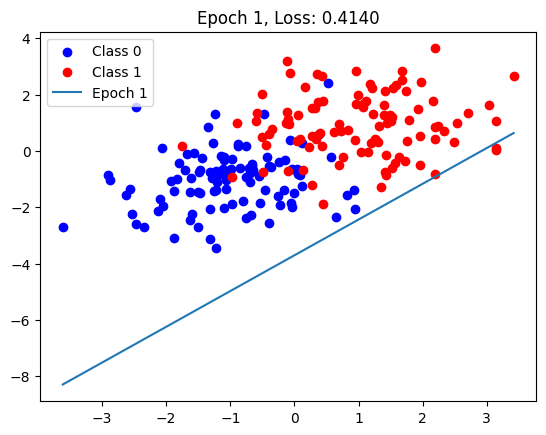

Epoch 21/100, Loss: 0.3852


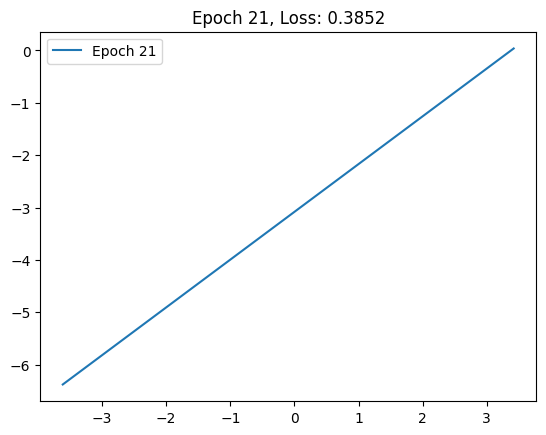

Epoch 41/100, Loss: 0.3551


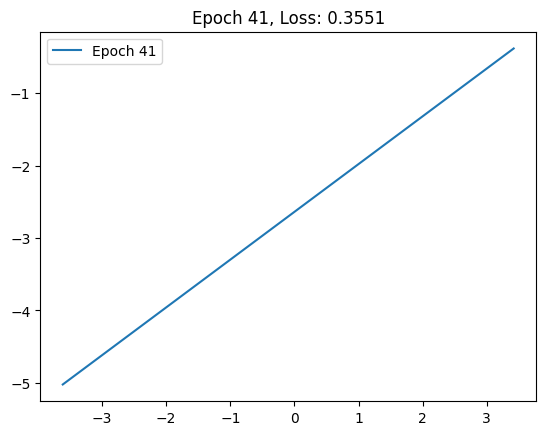

Epoch 61/100, Loss: 0.3250


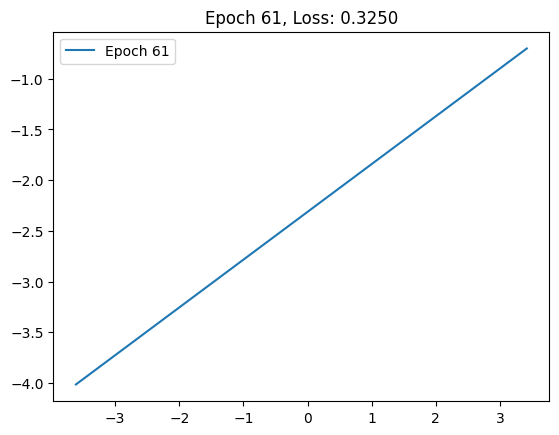

Epoch 81/100, Loss: 0.2961


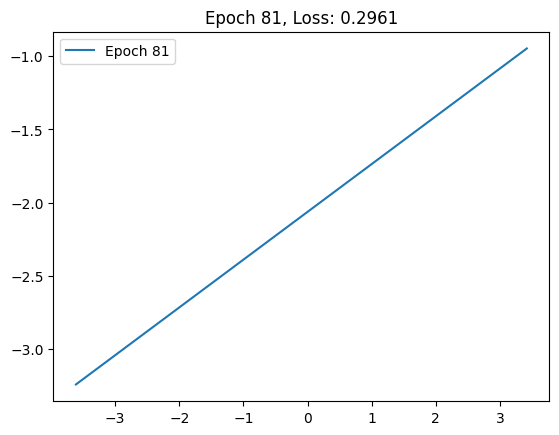

Epoch 100/100, Loss: 0.2710


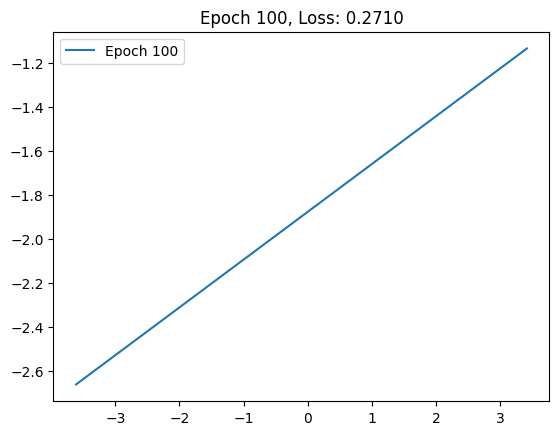

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Generate synthetic data
n_samples = 100
x_blue = torch.randn(n_samples, 2) - 1  # Blue class
x_red = torch.randn(n_samples, 2) + 1   # Red class

# Labels
y_blue = torch.zeros(n_samples)  # Blue = 0
y_red = torch.ones(n_samples)    # Red = 1

# Combine data and labels
x_data = torch.cat((x_blue, x_red), dim=0)
y_data = torch.cat((y_blue, y_red), dim=0)

# Initialize parameters
w = torch.randn(2, requires_grad=False)  # Weight (2D for 2 features)
b = torch.randn(1, requires_grad=False)  # Bias

# Learning rate
learning_rate = 0.01

# Plot initial data
plt.scatter(x_blue[:, 0], x_blue[:, 1], color='blue', label='Class 0')
plt.scatter(x_red[:, 0], x_red[:, 1], color='red', label='Class 1')

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Linear model prediction: y = w * x + b
    y_pred = x_data @ w + b
    
    # Sigmoid function for binary classification
    y_pred_sigmoid = torch.sigmoid(y_pred)
    
    # Calculate loss (Mean Squared Error)
    loss = torch.mean((y_pred_sigmoid - y_data) ** 2)
    
    # Manually compute gradients
    gradient_w = torch.mean((y_pred_sigmoid - y_data).unsqueeze(1) * x_data, dim=0)
    gradient_b = torch.mean(y_pred_sigmoid - y_data)
    
    # Update weights and bias
    w -= learning_rate * gradient_w
    b -= learning_rate * gradient_b
    
    # Print loss and plot decision boundary every 20 epochs
    if epoch % 20 == 0 or epoch == num_epochs - 1:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
        
        # Plot decision boundary
        x_boundary = torch.tensor([x_data[:, 0].min(), x_data[:, 0].max()])
        y_boundary = -(w[0] * x_boundary + b) / w[1]
        
        plt.plot(x_boundary.numpy(), y_boundary.numpy(), label=f'Epoch {epoch+1}')
        plt.legend()
        plt.title(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        plt.show()



Epoch 1/1000, Loss: 1.2769


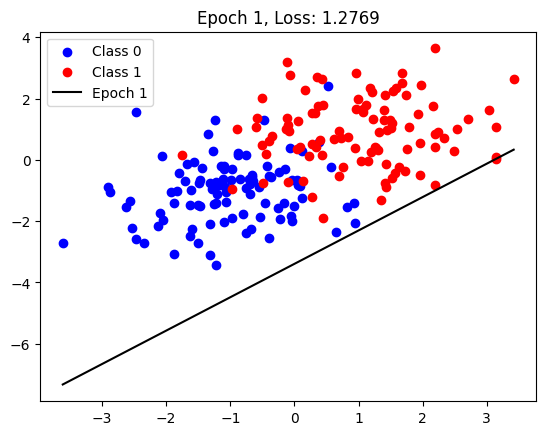

Epoch 101/1000, Loss: 0.2562


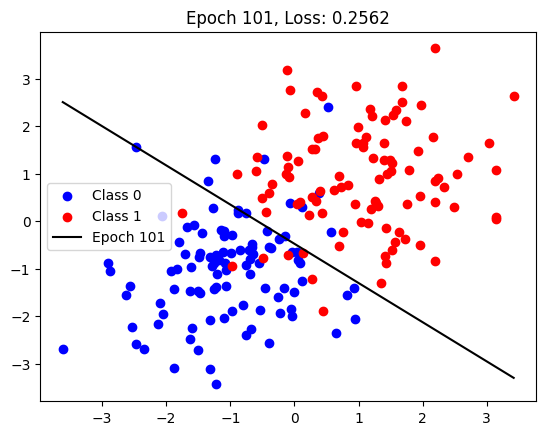

Epoch 201/1000, Loss: 0.2295


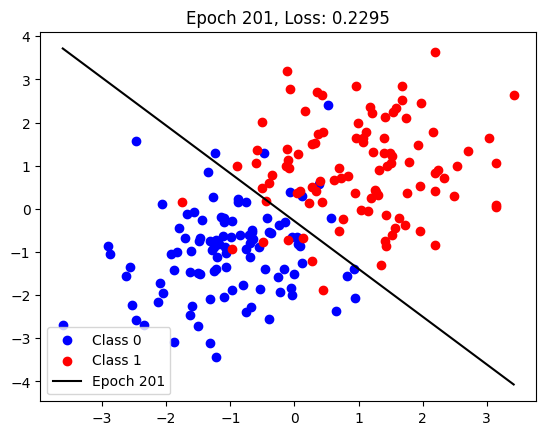

Epoch 301/1000, Loss: 0.2246


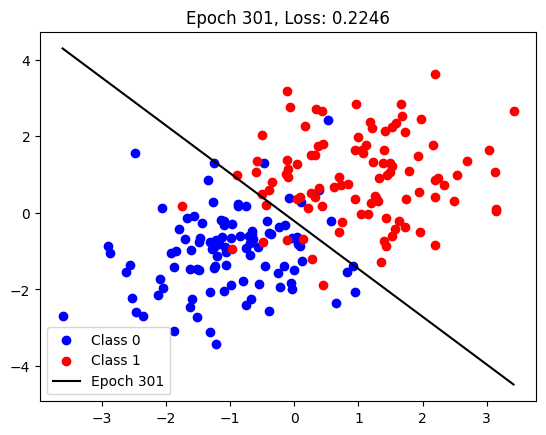

Epoch 401/1000, Loss: 0.2232


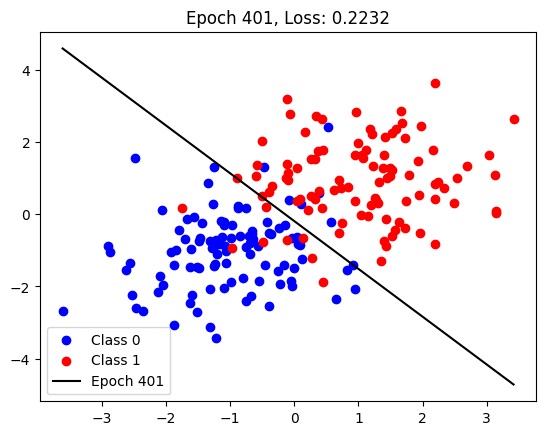

Epoch 501/1000, Loss: 0.2227


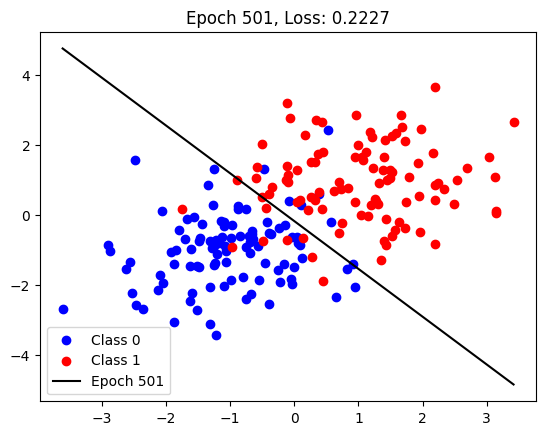

Epoch 601/1000, Loss: 0.2225


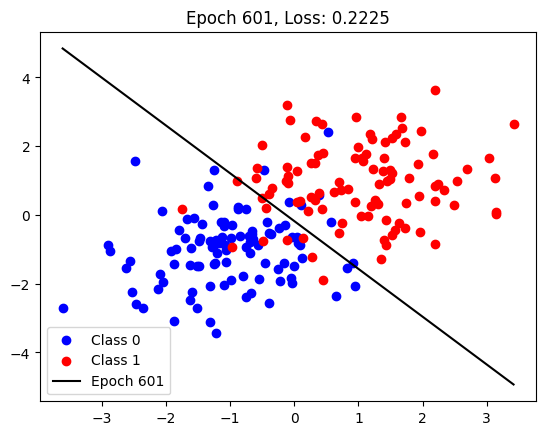

Epoch 701/1000, Loss: 0.2224


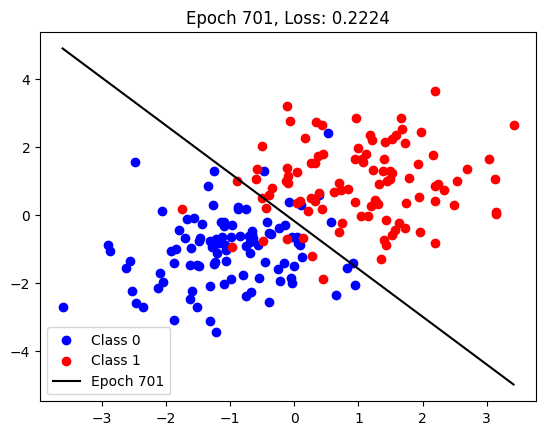

Epoch 801/1000, Loss: 0.2224


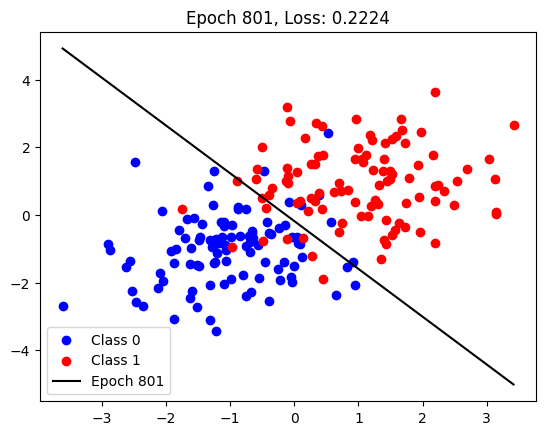

Epoch 901/1000, Loss: 0.2223


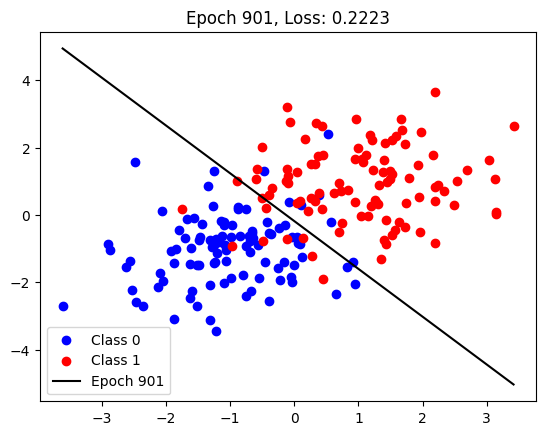

Epoch 1000/1000, Loss: 0.2223


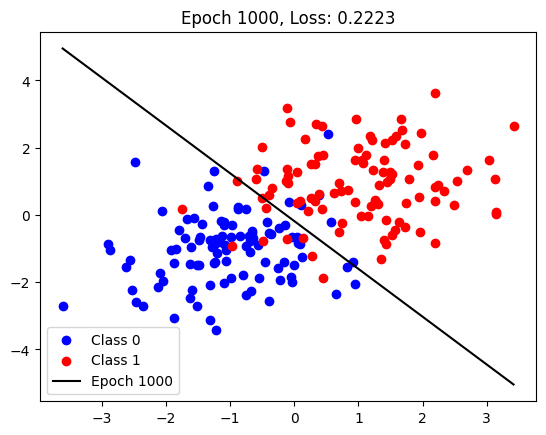

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Generate synthetic data
n_samples = 100
x_blue = torch.randn(n_samples, 2) - 1  # Blue class
x_red = torch.randn(n_samples, 2) + 1   # Red class

# Labels
y_blue = torch.zeros(n_samples)  # Blue = 0
y_red = torch.ones(n_samples)    # Red = 1

# Combine data and labels
x_data = torch.cat((x_blue, x_red), dim=0)
y_data = torch.cat((y_blue, y_red), dim=0)

# Initialize parameters
w = torch.randn(2, requires_grad=False)  # Weight (2D for 2 features)
b = torch.randn(1, requires_grad=False)  # Bias

# Learning rate
learning_rate = 0.1  # Increased learning rate for faster convergence

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Linear model prediction: y = w * x + b
    y_pred = x_data @ w + b
    
    # Sigmoid function for binary classification
    y_pred_sigmoid = torch.sigmoid(y_pred)
    
    # Calculate Binary Cross-Entropy Loss
    loss = -torch.mean(y_data * torch.log(y_pred_sigmoid) + (1 - y_data) * torch.log(1 - y_pred_sigmoid))
    
    # Manually compute gradients
    gradient_w = torch.mean((y_pred_sigmoid - y_data).unsqueeze(1) * x_data, dim=0)
    gradient_b = torch.mean(y_pred_sigmoid - y_data)
    
    # Update weights and bias
    w -= learning_rate * gradient_w
    b -= learning_rate * gradient_b
    
    # Print loss and plot decision boundary every 100 epochs
    if epoch % 100 == 0 or epoch == num_epochs - 1:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
        
        # Plot decision boundary
        x_boundary = torch.tensor([x_data[:, 0].min(), x_data[:, 0].max()])
        y_boundary = -(w[0] * x_boundary + b) / w[1]
        
        plt.scatter(x_blue[:, 0], x_blue[:, 1], color='blue', label='Class 0')
        plt.scatter(x_red[:, 0], x_red[:, 1], color='red', label='Class 1')
        plt.plot(x_boundary.numpy(), y_boundary.numpy(), 'k-', label=f'Epoch {epoch+1}')
        plt.legend()
        plt.title(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        plt.show()


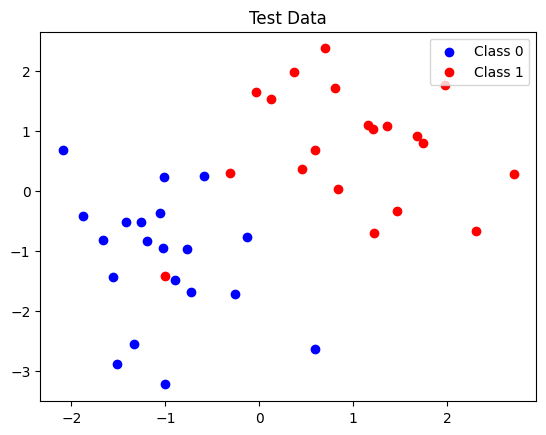

In [3]:
# Generate synthetic test data
n_test_samples = 20
x_test_blue = torch.randn(n_test_samples, 2) - 1  # Blue class
x_test_red = torch.randn(n_test_samples, 2) + 1   # Red class

# Labels for the test data
y_test_blue = torch.zeros(n_test_samples)  # Blue = 0
y_test_red = torch.ones(n_test_samples)    # Red = 1

# Combine test data and labels
x_test = torch.cat((x_test_blue, x_test_red), dim=0)
y_test = torch.cat((y_test_blue, y_test_red), dim=0)

# Visualize the test data
plt.scatter(x_test_blue[:, 0], x_test_blue[:, 1], color='blue', label='Class 0')
plt.scatter(x_test_red[:, 0], x_test_red[:, 1], color='red', label='Class 1')
plt.title('Test Data')
plt.legend()
plt.show()


In [4]:
# Make predictions on test data
y_test_pred = torch.sigmoid(x_test @ w + b)

# Convert probabilities to binary predictions (0 or 1)
y_test_pred_binary = (y_test_pred >= 0.5).float()

# Print the predictions and actual labels
for i in range(len(y_test)):
    print(f"Test Sample {i+1}: True Label = {y_test[i]}, Predicted = {y_test_pred_binary[i]}")


Test Sample 1: True Label = 0.0, Predicted = 0.0
Test Sample 2: True Label = 0.0, Predicted = 0.0
Test Sample 3: True Label = 0.0, Predicted = 0.0
Test Sample 4: True Label = 0.0, Predicted = 0.0
Test Sample 5: True Label = 0.0, Predicted = 0.0
Test Sample 6: True Label = 0.0, Predicted = 0.0
Test Sample 7: True Label = 0.0, Predicted = 0.0
Test Sample 8: True Label = 0.0, Predicted = 0.0
Test Sample 9: True Label = 0.0, Predicted = 0.0
Test Sample 10: True Label = 0.0, Predicted = 0.0
Test Sample 11: True Label = 0.0, Predicted = 0.0
Test Sample 12: True Label = 0.0, Predicted = 0.0
Test Sample 13: True Label = 0.0, Predicted = 0.0
Test Sample 14: True Label = 0.0, Predicted = 0.0
Test Sample 15: True Label = 0.0, Predicted = 0.0
Test Sample 16: True Label = 0.0, Predicted = 0.0
Test Sample 17: True Label = 0.0, Predicted = 0.0
Test Sample 18: True Label = 0.0, Predicted = 0.0
Test Sample 19: True Label = 0.0, Predicted = 0.0
Test Sample 20: True Label = 0.0, Predicted = 0.0
Test Samp

In [5]:
# Calculate accuracy
accuracy = torch.mean((y_test_pred_binary == y_test).float())

print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")


Test Accuracy: 97.50%


Epoch 1/1000, Loss: 1.2769


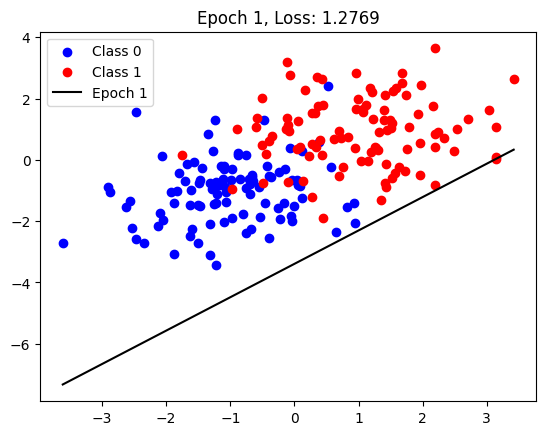

Epoch 101/1000, Loss: 0.2562


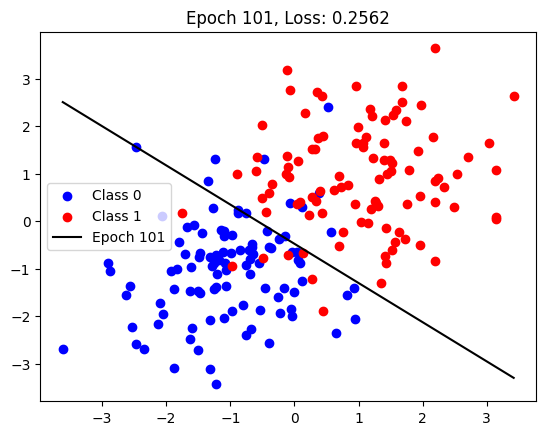

Epoch 201/1000, Loss: 0.2295


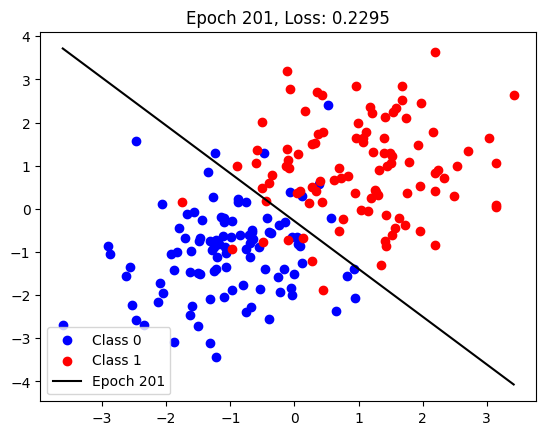

Epoch 301/1000, Loss: 0.2246


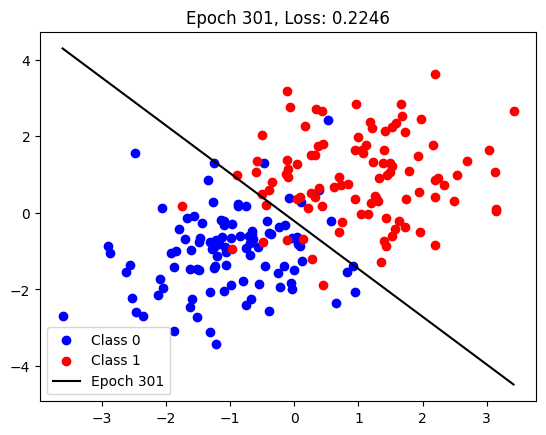

Epoch 401/1000, Loss: 0.2232


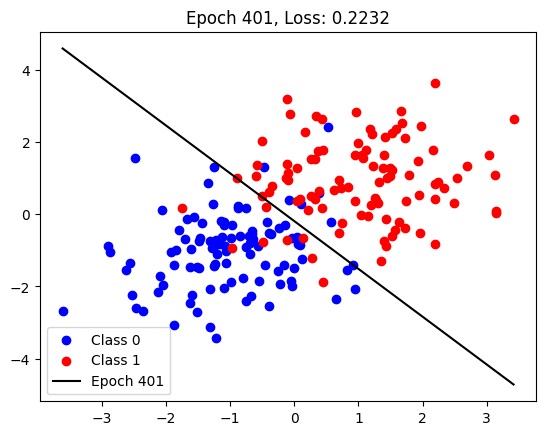

Epoch 501/1000, Loss: 0.2227


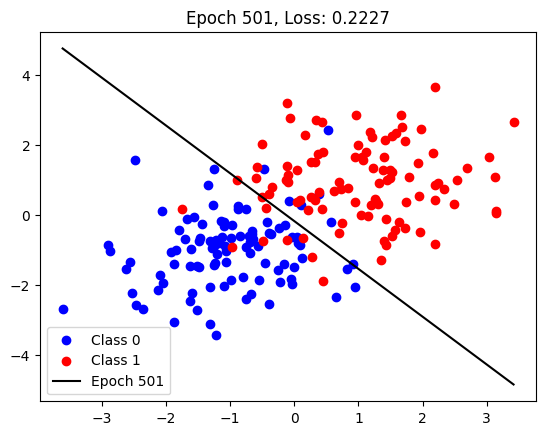

Epoch 601/1000, Loss: 0.2225


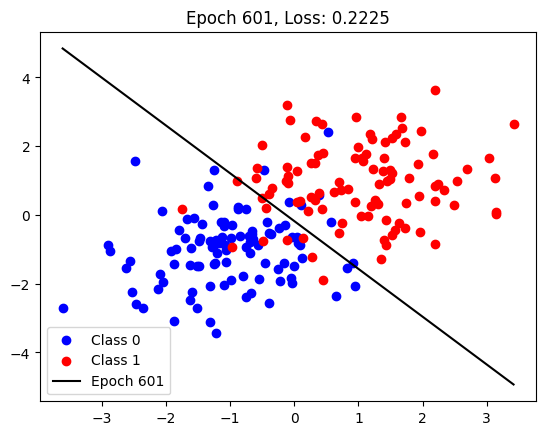

Epoch 701/1000, Loss: 0.2224


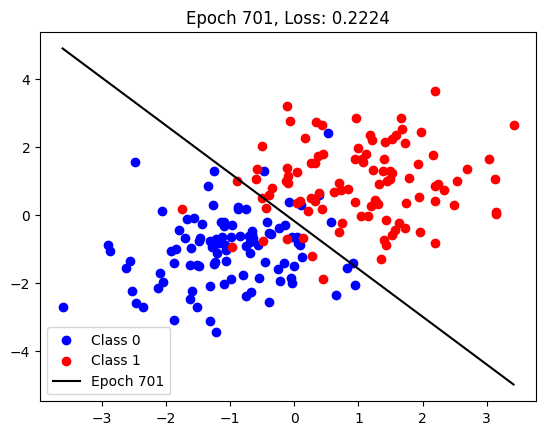

Epoch 801/1000, Loss: 0.2224


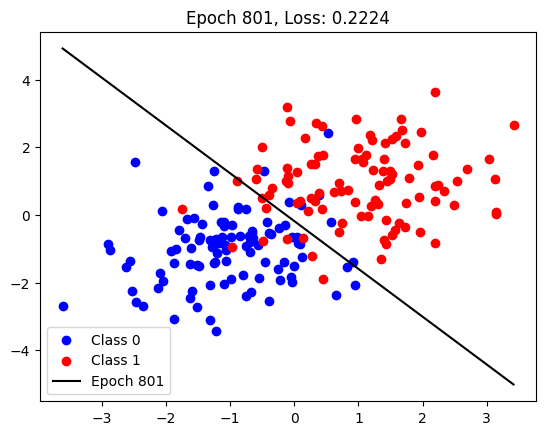

Epoch 901/1000, Loss: 0.2223


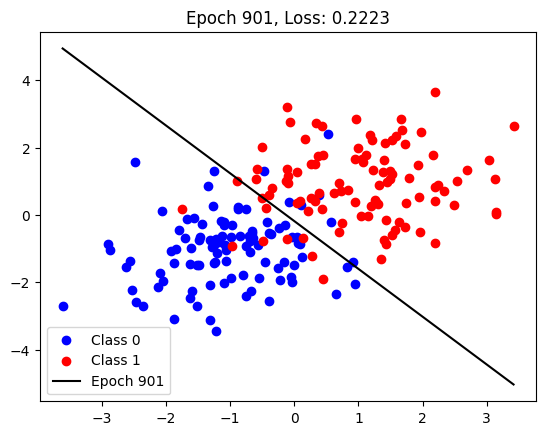

Epoch 1000/1000, Loss: 0.2223


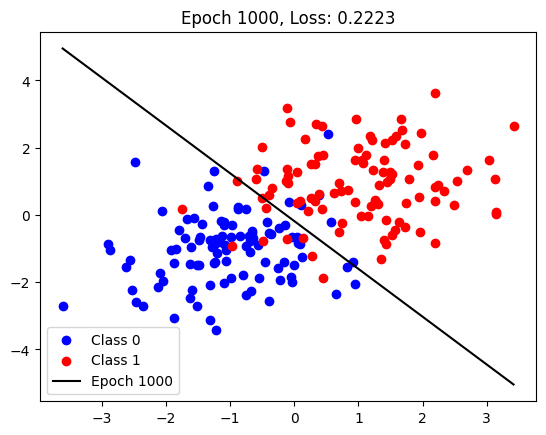

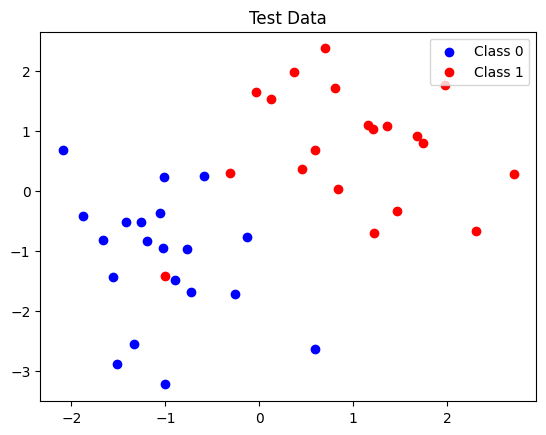

Test Sample 1: True Label = 0.0, Predicted = 0.0
Test Sample 2: True Label = 0.0, Predicted = 0.0
Test Sample 3: True Label = 0.0, Predicted = 0.0
Test Sample 4: True Label = 0.0, Predicted = 0.0
Test Sample 5: True Label = 0.0, Predicted = 0.0
Test Sample 6: True Label = 0.0, Predicted = 0.0
Test Sample 7: True Label = 0.0, Predicted = 0.0
Test Sample 8: True Label = 0.0, Predicted = 0.0
Test Sample 9: True Label = 0.0, Predicted = 0.0
Test Sample 10: True Label = 0.0, Predicted = 0.0
Test Sample 11: True Label = 0.0, Predicted = 0.0
Test Sample 12: True Label = 0.0, Predicted = 0.0
Test Sample 13: True Label = 0.0, Predicted = 0.0
Test Sample 14: True Label = 0.0, Predicted = 0.0
Test Sample 15: True Label = 0.0, Predicted = 0.0
Test Sample 16: True Label = 0.0, Predicted = 0.0
Test Sample 17: True Label = 0.0, Predicted = 0.0
Test Sample 18: True Label = 0.0, Predicted = 0.0
Test Sample 19: True Label = 0.0, Predicted = 0.0
Test Sample 20: True Label = 0.0, Predicted = 0.0
Test Samp

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Generate synthetic training data
n_samples = 100
x_blue = torch.randn(n_samples, 2) - 1  # Blue class
x_red = torch.randn(n_samples, 2) + 1   # Red class

# Labels
y_blue = torch.zeros(n_samples)  # Blue = 0
y_red = torch.ones(n_samples)    # Red = 1

# Combine training data and labels
x_data = torch.cat((x_blue, x_red), dim=0)
y_data = torch.cat((y_blue, y_red), dim=0)

# Initialize parameters
w = torch.randn(2, requires_grad=False)  # Weight (2D for 2 features)
b = torch.randn(1, requires_grad=False)  # Bias

# Learning rate
learning_rate = 0.1

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Linear model prediction: y = w * x + b
    y_pred = x_data @ w + b
    
    # Sigmoid function for binary classification
    y_pred_sigmoid = torch.sigmoid(y_pred)
    
    # Calculate Binary Cross-Entropy Loss
    loss = -torch.mean(y_data * torch.log(y_pred_sigmoid) + (1 - y_data) * torch.log(1 - y_pred_sigmoid))
    
    # Manually compute gradients
    gradient_w = torch.mean((y_pred_sigmoid - y_data).unsqueeze(1) * x_data, dim=0)
    gradient_b = torch.mean(y_pred_sigmoid - y_data)
    
    # Update weights and bias
    w -= learning_rate * gradient_w
    b -= learning_rate * gradient_b
    
    # Print loss and plot decision boundary every 100 epochs
    if epoch % 100 == 0 or epoch == num_epochs - 1:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
        
        # Plot decision boundary
        x_boundary = torch.tensor([x_data[:, 0].min(), x_data[:, 0].max()])
        y_boundary = -(w[0] * x_boundary + b) / w[1]
        
        plt.scatter(x_blue[:, 0], x_blue[:, 1], color='blue', label='Class 0')
        plt.scatter(x_red[:, 0], x_red[:, 1], color='red', label='Class 1')
        plt.plot(x_boundary.numpy(), y_boundary.numpy(), 'k-', label=f'Epoch {epoch+1}')
        plt.legend()
        plt.title(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        plt.show()

# Generate synthetic test data
n_test_samples = 20
x_test_blue = torch.randn(n_test_samples, 2) - 1  # Blue class
x_test_red = torch.randn(n_test_samples, 2) + 1   # Red class

# Labels for the test data
y_test_blue = torch.zeros(n_test_samples)  # Blue = 0
y_test_red = torch.ones(n_test_samples)    # Red = 1

# Combine test data and labels
x_test = torch.cat((x_test_blue, x_test_red), dim=0)
y_test = torch.cat((y_test_blue, y_test_red), dim=0)

# Visualize the test data
plt.scatter(x_test_blue[:, 0], x_test_blue[:, 1], color='blue', label='Class 0')
plt.scatter(x_test_red[:, 0], x_test_red[:, 1], color='red', label='Class 1')
plt.title('Test Data')
plt.legend()
plt.show()

# Make predictions on test data
y_test_pred = torch.sigmoid(x_test @ w + b)

# Convert probabilities to binary predictions (0 or 1)
y_test_pred_binary = (y_test_pred >= 0.5).float()

# Print the predictions and actual labels
for i in range(len(y_test)):
    print(f"Test Sample {i+1}: True Label = {y_test[i]}, Predicted = {y_test_pred_binary[i]}")

# Calculate accuracy
accuracy = torch.mean((y_test_pred_binary == y_test).float())
print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")


Epoch 1/1000, Loss: 0.6457


C:\Users\kdhome\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


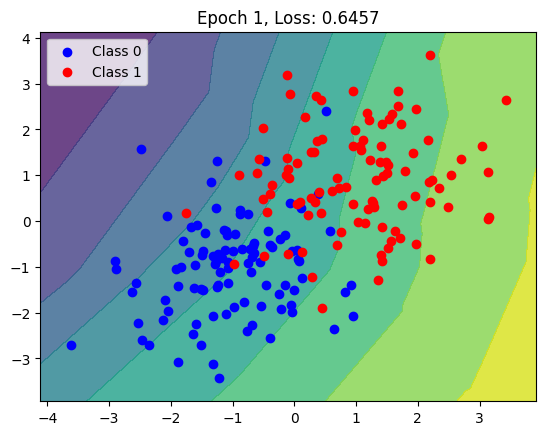

Epoch 101/1000, Loss: 0.2221


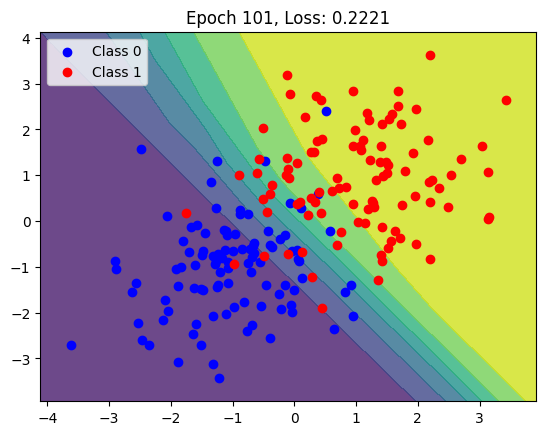

Epoch 201/1000, Loss: 0.2172


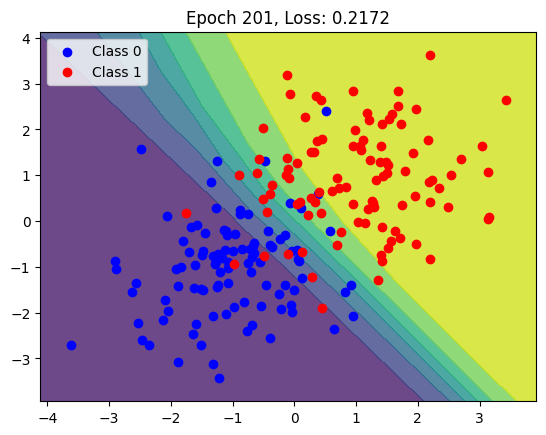

Epoch 301/1000, Loss: 0.2168


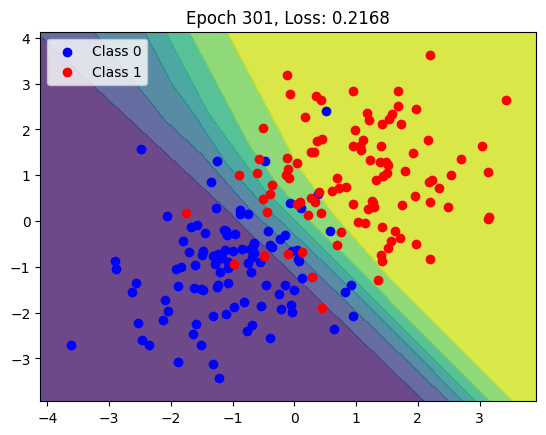

Epoch 401/1000, Loss: 0.2166


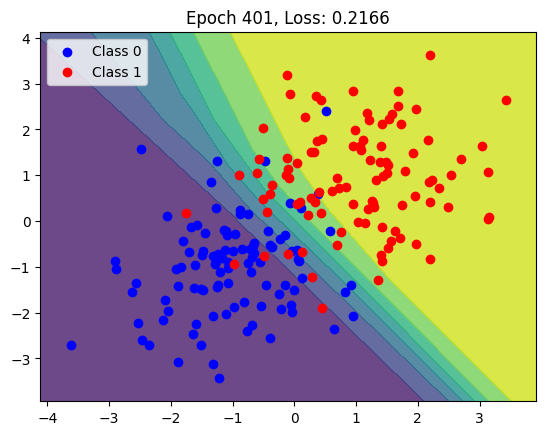

Epoch 501/1000, Loss: 0.2165


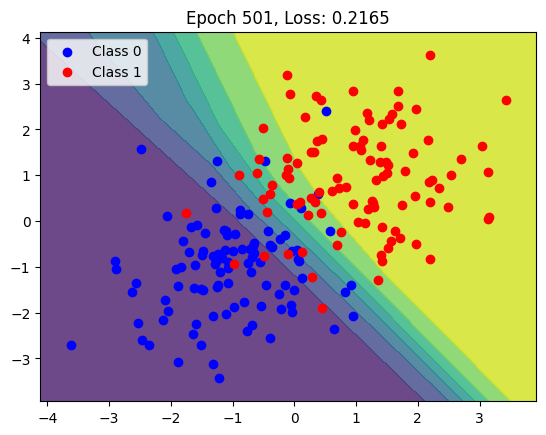

Epoch 601/1000, Loss: 0.2164


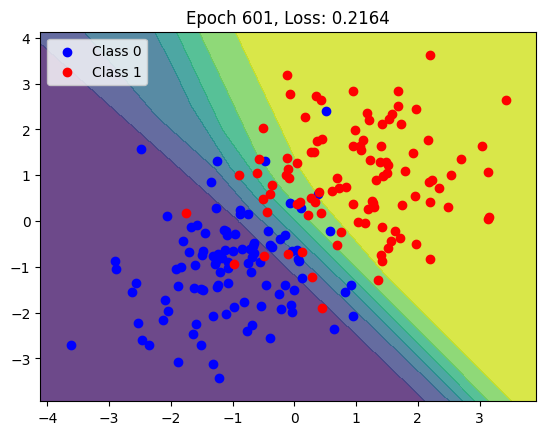

Epoch 701/1000, Loss: 0.2163


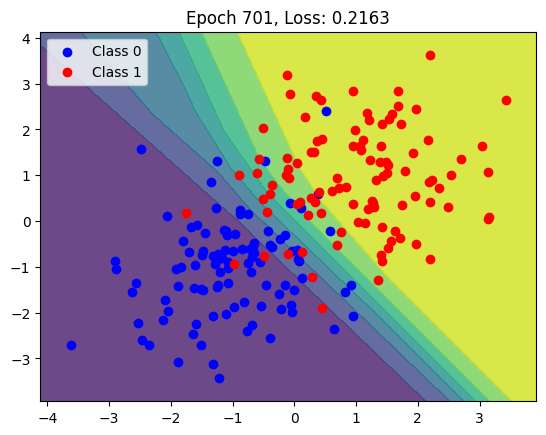

Epoch 801/1000, Loss: 0.2161


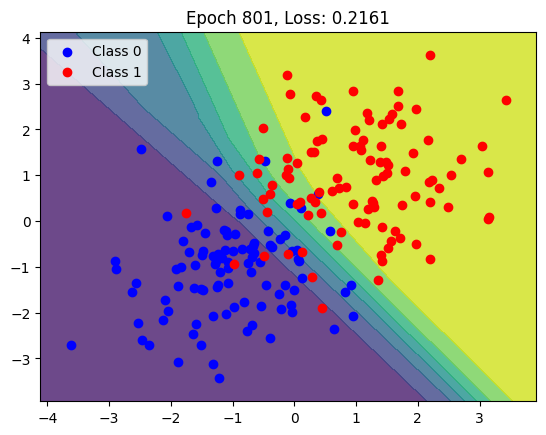

Epoch 901/1000, Loss: 0.2159


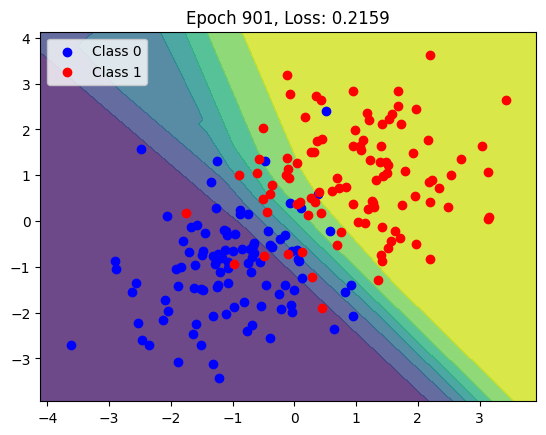

Epoch 1000/1000, Loss: 0.2157


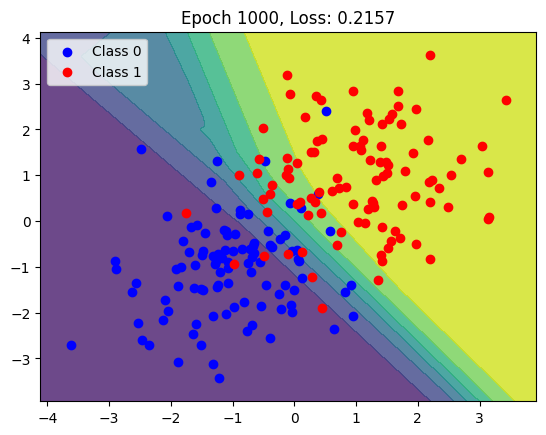

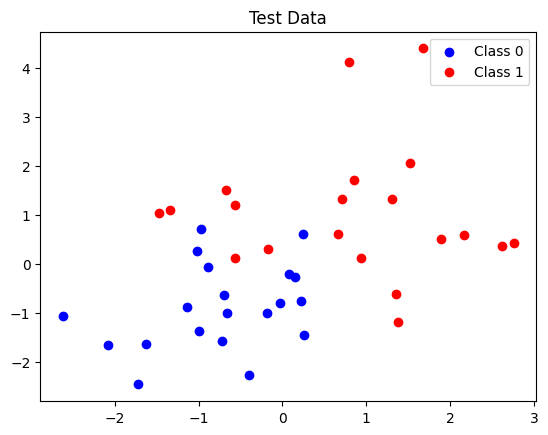

Test Sample 1: True Label = 0.0, Predicted = 0.0
Test Sample 2: True Label = 0.0, Predicted = 0.0
Test Sample 3: True Label = 0.0, Predicted = 0.0
Test Sample 4: True Label = 0.0, Predicted = 0.0
Test Sample 5: True Label = 0.0, Predicted = 1.0
Test Sample 6: True Label = 0.0, Predicted = 0.0
Test Sample 7: True Label = 0.0, Predicted = 0.0
Test Sample 8: True Label = 0.0, Predicted = 0.0
Test Sample 9: True Label = 0.0, Predicted = 0.0
Test Sample 10: True Label = 0.0, Predicted = 1.0
Test Sample 11: True Label = 0.0, Predicted = 0.0
Test Sample 12: True Label = 0.0, Predicted = 0.0
Test Sample 13: True Label = 0.0, Predicted = 0.0
Test Sample 14: True Label = 0.0, Predicted = 0.0
Test Sample 15: True Label = 0.0, Predicted = 0.0
Test Sample 16: True Label = 0.0, Predicted = 0.0
Test Sample 17: True Label = 0.0, Predicted = 0.0
Test Sample 18: True Label = 0.0, Predicted = 1.0
Test Sample 19: True Label = 0.0, Predicted = 0.0
Test Sample 20: True Label = 0.0, Predicted = 0.0
Test Samp

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Generate synthetic training data (same as before)
n_samples = 100
x_blue = torch.randn(n_samples, 2) - 1  # Blue class
x_red = torch.randn(n_samples, 2) + 1   # Red class

# Labels
y_blue = torch.zeros(n_samples)  # Blue = 0
y_red = torch.ones(n_samples)    # Red = 1

# Combine training data and labels
x_data = torch.cat((x_blue, x_red), dim=0)
y_data = torch.cat((y_blue, y_red), dim=0)

# Define a simple neural network model
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.hidden = nn.Linear(2, 10)  # Hidden layer with 10 neurons
        self.output = nn.Linear(10, 1)  # Output layer
        
    def forward(self, x):
        x = torch.relu(self.hidden(x))  # ReLU activation function
        x = torch.sigmoid(self.output(x))  # Sigmoid for binary classification
        return x

# Initialize the model
model = NonLinearModel()

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data).squeeze()
    
    # Compute loss
    loss = criterion(y_pred, y_data)
    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss and plot decision boundary every 100 epochs
    if epoch % 100 == 0 or epoch == num_epochs - 1:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
        
        # Plot decision boundary
        x_min, x_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
        y_min, y_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
        xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01),
                                torch.arange(y_min, y_max, 0.01))
        
        grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
        with torch.no_grad():
            zz = model(grid).reshape(xx.shape)
        
        plt.contourf(xx, yy, zz, alpha=0.8)
        plt.scatter(x_blue[:, 0], x_blue[:, 1], color='blue', label='Class 0')
        plt.scatter(x_red[:, 0], x_red[:, 1], color='red', label='Class 1')
        plt.title(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        plt.legend()
        plt.show()

# Generate synthetic test data (same as before)
n_test_samples = 20
x_test_blue = torch.randn(n_test_samples, 2) - 1  # Blue class
x_test_red = torch.randn(n_test_samples, 2) + 1   # Red class

# Labels for the test data
y_test_blue = torch.zeros(n_test_samples)  # Blue = 0
y_test_red = torch.ones(n_test_samples)    # Red = 1

# Combine test data and labels
x_test = torch.cat((x_test_blue, x_test_red), dim=0)
y_test = torch.cat((y_test_blue, y_test_red), dim=0)

# Visualize the test data
plt.scatter(x_test_blue[:, 0], x_test_blue[:, 1], color='blue', label='Class 0')
plt.scatter(x_test_red[:, 0], x_test_red[:, 1], color='red', label='Class 1')
plt.title('Test Data')
plt.legend()
plt.show()

# Make predictions on test data
with torch.no_grad():
    y_test_pred = model(x_test).squeeze()

# Convert probabilities to binary predictions (0 or 1)
y_test_pred_binary = (y_test_pred >= 0.5).float()

# Print the predictions and actual labels
for i in range(len(y_test)):
    print(f"Test Sample {i+1}: True Label = {y_test[i]}, Predicted = {y_test_pred_binary[i]}")

# Calculate accuracy
accuracy = torch.mean((y_test_pred_binary == y_test).float())
print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")


In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Generate synthetic training data (same as before)
n_samples = 100
x_blue = torch.randn(n_samples, 2) - 1  # Blue class
x_red = torch.randn(n_samples, 2) + 1   # Red class

# Labels
y_blue = torch.zeros(n_samples)  # Blue = 0
y_red = torch.ones(n_samples)    # Red = 1

# Combine training data and labels
x_data = torch.cat((x_blue, x_red), dim=0)
y_data = torch.cat((y_blue, y_red), dim=0)

# Define a deep neural network from scratch
class DeepNeuralNetwork:
    def __init__(self):
        # Initialize weights for 3-layer network
        self.w1 = torch.randn(2, 10, requires_grad=False)  # Layer 1 weights
        self.b1 = torch.randn(10, requires_grad=False)     # Layer 1 bias
        
        self.w2 = torch.randn(10, 10, requires_grad=False)  # Layer 2 weights
        self.b2 = torch.randn(10, requires_grad=False)     # Layer 2 bias
        
        self.w3 = torch.randn(10, 1, requires_grad=False)   # Output layer weights
        self.b3 = torch.randn(1, requires_grad=False)      # Output layer bias

    def relu(self, x):
        return torch.maximum(x, torch.tensor(0.0))

    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def forward(self, x):
        # Layer 1
        z1 = x @ self.w1 + self.b1
        a1 = self.relu(z1)

        # Layer 2
        z2 = a1 @ self.w2 + self.b2
        a2 = self.relu(z2)

        # Output Layer
        z3 = a2 @ self.w3 + self.b3
        a3 = self.sigmoid(z3)

        return a3.squeeze()

    def backward(self, x, y, y_pred, learning_rate):
        # Calculate loss gradient w.r.t output (Binary Cross-Entropy Loss)
        dL_da3 = -(y / y_pred) + (1 - y) / (1 - y_pred)
        da3_dz3 = y_pred * (1 - y_pred)

        # Gradients for output layer (Layer 3)
        dL_dz3 = dL_da3 * da3_dz3
        dL_dw3 = torch.mm(x.T, dL_dz3.unsqueeze(1))
        dL_db3 = dL_dz3.sum()

        # Gradients for hidden layer 2
        da2_dz2 = (x > 0).float()
        dL_da2 = torch.mm(dL_dz3.unsqueeze(1), self.w3.T)
        dL_dz2 = dL_da2 * da2_dz2
        dL_dw2 = torch.mm(x.T, dL_dz2)
        dL_db2 = dL_dz2.sum()

        # Gradients for hidden layer 1
        da1_dz1 = (x > 0).float()
        dL_da1 = torch.mm(dL_dz2, self.w2.T)
        dL_dz1 = dL_da1 * da1_dz1
        dL_dw1 = torch.mm(x.T, dL_dz1)
        dL_db1 = dL_dz1.sum()

        # Update weights and biases
        self.w3 -= learning_rate * dL_dw3
        self.b3 -= learning_rate * dL_db3

        self.w2 -= learning_rate * dL_dw2
        self.b2 -= learning_rate * dL_db2

        self.w1 -= learning_rate * dL_dw1
        self.b1 -= learning_rate * dL_db1

# Initialize the model
model = DeepNeuralNetwork()

# Learning rate
learning_rate = 0.01

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model.forward(x_data)

    # Compute Binary Cross-Entropy Loss
    loss = -torch.mean(y_data * torch.log(y_pred) + (1 - y_data) * torch.log(1 - y_pred))

    # Backward pass and update weights
    model.backward(x_data, y_data, y_pred, learning_rate)

    # Print loss and plot decision boundary every 100 epochs
    if epoch % 100 == 0 or epoch == num_epochs - 1:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
        
        # Plot decision boundary
        x_min, x_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
        y_min, y_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
        xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01),
                                torch.arange(y_min, y_max, 0.01))
        
        grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
        with torch.no_grad():
            zz = model.forward(grid).reshape(xx.shape)
        
        plt.contourf(xx, yy, zz, alpha=0.8)
        plt.scatter(x_blue[:, 0], x_blue[:, 1], color='blue', label='Class 0')
        plt.scatter(x_red[:, 0], x_red[:, 1], color='red', label='Class 1')
        plt.title(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        plt.legend()
        plt.show()

# Generate synthetic test data (same as before)
n_test_samples = 20
x_test_blue = torch.randn(n_test_samples, 2) - 1  # Blue class
x_test_red = torch.randn(n_test_samples, 2) + 1   # Red class

# Labels for the test data
y_test_blue = torch.zeros(n_test_samples)  # Blue = 0
y_test_red = torch.ones(n_test_samples)    # Red = 1

# Combine test data and labels
x_test = torch.cat((x_test_blue, x_test_red), dim=0)
y_test = torch.cat((y_test_blue, y_test_red), dim=0)

# Visualize the test data
plt.scatter(x_test_blue[:, 0], x_test_blue[:, 1], color='blue', label='Class 0')
plt.scatter(x_test_red[:, 0], x_test_red[:, 1], color='red', label='Class 1')
plt.title('Test Data')
plt.legend()
plt.show()

# Make predictions on test data
with torch.no_grad():
    y_test_pred = model.forward(x_test)

# Convert probabilities to binary predictions (0 or 1)
y_test_pred_binary = (y_test_pred >= 0.5).float()

# Print the predictions and actual labels
for i in range(len(y_test)):
    print(f"Test Sample {i+1}: True Label = {y_test[i]}, Predicted = {y_test_pred_binary[i]}")

# Calculate accuracy
accuracy = torch.mean((y_test_pred_binary == y_test).float())
print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")


RuntimeError: The size of tensor a (10) must match the size of tensor b (2) at non-singleton dimension 1

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Generate synthetic training data (same as before)
n_samples = 100
x_blue = torch.randn(n_samples, 2) - 1  # Blue class
x_red = torch.randn(n_samples, 2) + 1   # Red class

# Labels
y_blue = torch.zeros(n_samples)  # Blue = 0
y_red = torch.ones(n_samples)    # Red = 1

# Combine training data and labels
x_data = torch.cat((x_blue, x_red), dim=0)
y_data = torch.cat((y_blue, y_red), dim=0)

# Define a deep neural network from scratch
class DeepNeuralNetwork:
    def __init__(self):
        # Initialize weights for 3-layer network
        self.w1 = torch.randn(2, 10, requires_grad=False)  # Layer 1 weights
        self.b1 = torch.randn(10, requires_grad=False)     # Layer 1 bias
        
        self.w2 = torch.randn(10, 10, requires_grad=False)  # Layer 2 weights
        self.b2 = torch.randn(10, requires_grad=False)     # Layer 2 bias
        
        self.w3 = torch.randn(10, 1, requires_grad=False)   # Output layer weights
        self.b3 = torch.randn(1, requires_grad=False)      # Output layer bias

    def relu(self, x):
        return torch.maximum(x, torch.tensor(0.0))

    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def forward(self, x):
        # Layer 1
        self.z1 = x @ self.w1 + self.b1
        self.a1 = self.relu(self.z1)

        # Layer 2
        self.z2 = self.a1 @ self.w2 + self.b2
        self.a2 = self.relu(self.z2)

        # Output Layer
        self.z3 = self.a2 @ self.w3 + self.b3
        a3 = self.sigmoid(self.z3)

        return a3.squeeze()

    def backward(self, x, y, y_pred, learning_rate):
        # Calculate loss gradient w.r.t output (Binary Cross-Entropy Loss)
        dL_da3 = -(y / y_pred) + (1 - y) / (1 - y_pred)
        da3_dz3 = y_pred * (1 - y_pred)

        # Gradients for output layer (Layer 3)
        dL_dz3 = dL_da3 * da3_dz3
        dL_dw3 = torch.mm(self.a2.T, dL_dz3.unsqueeze(1))
        dL_db3 = dL_dz3.sum()

        # Gradients for hidden layer 2
        da2_dz2 = (self.z2 > 0).float()
        dL_da2 = torch.mm(dL_dz3.unsqueeze(1), self.w3.T)
        dL_dz2 = dL_da2 * da2_dz2
        dL_dw2 = torch.mm(self.a1.T, dL_dz2)
        dL_db2 = dL_dz2.sum()

        # Gradients for hidden layer 1
        da1_dz1 = (self.z1 > 0).float()
        dL_da1 = torch.mm(dL_dz2, self.w2.T)
        dL_dz1 = dL_da1 * da1_dz1
        dL_dw1 = torch.mm(x.T, dL_dz1)
        dL_db1 = dL_dz1.sum()

        # Update weights and biases
        self.w3 -= learning_rate * dL_dw3
        self.b3 -= learning_rate * dL_db3

        self.w2 -= learning_rate * dL_dw2
        self.b2 -= learning_rate * dL_db2

        self.w1 -= learning_rate * dL_dw1
        self.b1 -= learning_rate * dL_db1

# Initialize the model
model = DeepNeuralNetwork()

# Learning rate
learning_rate = 0.01

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model.forward(x_data)

    # Compute Binary Cross-Entropy Loss
    loss = -torch.mean(y_data * torch.log(y_pred) + (1 - y_data) * torch.log(1 - y_pred))

    # Backward pass and update weights
    model.backward(x_data, y_data, y_pred, learning_rate)

    # Print loss and plot decision boundary every 100 epochs
    if epoch % 100 == 0 or epoch == num_epochs - 1:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
        
        # Plot decision boundary
        x_min, x_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
        y_min, y_max = x_data[:, 1].min() - 0.5, y_data[:, 1].max() + 0.5
        xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01),
                                torch.arange(y_min, y_max, 0.01))
        
        grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
        with torch.no_grad():
            zz = model.forward(grid).reshape(xx.shape)
        
        plt.contourf(xx, yy, zz, alpha=0.8)
        plt.scatter(x_blue[:, 0], x_blue[:, 1], color='blue', label='Class 0')
        plt.scatter(x_red[:, 0], x_red[:, 1], color='red', label='Class 1')
        plt.title(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        plt.legend()
        plt.show()

# Generate synthetic test data (same as before)
n_test_samples = 20
x_test_blue = torch.randn(n_test_samples, 2) - 1  # Blue class
x_test_red = torch.randn(n_test_samples, 2) + 1   # Red class

# Labels for the test data
y_test_blue = torch.zeros(n_test_samples)  # Blue = 0
y_test_red = torch.ones(n_test_samples)    # Red = 1

# Combine test data and labels
x_test = torch.cat((x_test_blue, x_test_red), dim=0)
y_test = torch.cat((y_test_blue, y_test_red), dim=0)

# Visualize the test data
plt.scatter(x_test_blue[:, 0], x_test_blue[:, 1], color='blue', label='Class 0')
plt.scatter(x_test_red[:, 0], x_test_red[:, 1], color='red', label='Class 1')
plt.title('Test Data')
plt.legend()
plt.show()

# Make predictions on test data
with torch.no_grad():
    y_test_pred = model.forward(x_test)

# Convert probabilities to binary predictions (0 or 1)
y_test_pred_binary = (y_test_pred >= 0.5).float()

# Print the predictions and actual labels
for i in range(len(y_test)):
    print(f"Test Sample {i+1}: True Label = {y_test[i]}, Predicted = {y_test_pred_binary[i]}")

# Calculate accuracy
accuracy = torch.mean((y_test_pred_binary == y_test).float())
print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")


Epoch 1/1000, Loss: 9.0507


IndexError: too many indices for tensor of dimension 1

 loss  tensor(nan)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
Epoch 1/1000, Loss: nan


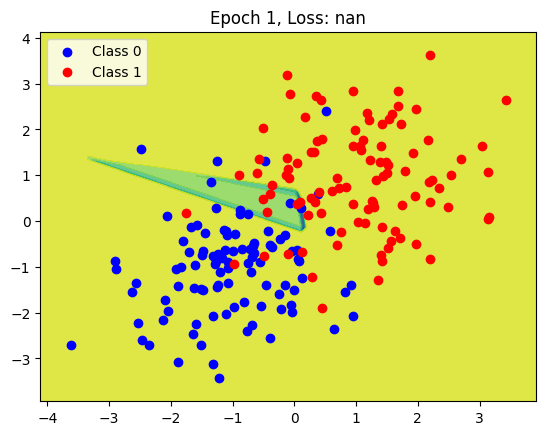

 loss  tensor(nan)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
 loss  tensor(nan)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

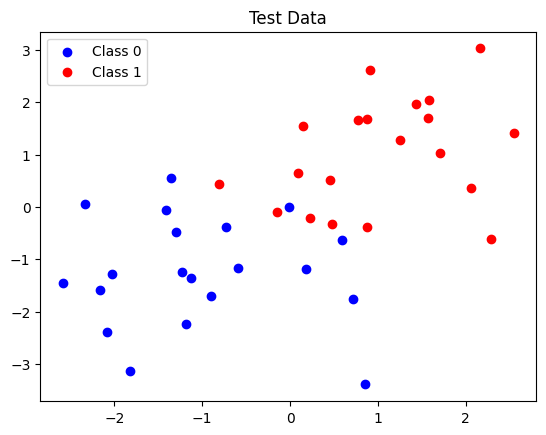

Test Sample 1: True Label = 0.0, Predicted = 0.0
Test Sample 2: True Label = 0.0, Predicted = 0.0
Test Sample 3: True Label = 0.0, Predicted = 0.0
Test Sample 4: True Label = 0.0, Predicted = 0.0
Test Sample 5: True Label = 0.0, Predicted = 0.0
Test Sample 6: True Label = 0.0, Predicted = 0.0
Test Sample 7: True Label = 0.0, Predicted = 0.0
Test Sample 8: True Label = 0.0, Predicted = 0.0
Test Sample 9: True Label = 0.0, Predicted = 0.0
Test Sample 10: True Label = 0.0, Predicted = 0.0
Test Sample 11: True Label = 0.0, Predicted = 0.0
Test Sample 12: True Label = 0.0, Predicted = 0.0
Test Sample 13: True Label = 0.0, Predicted = 0.0
Test Sample 14: True Label = 0.0, Predicted = 0.0
Test Sample 15: True Label = 0.0, Predicted = 0.0
Test Sample 16: True Label = 0.0, Predicted = 0.0
Test Sample 17: True Label = 0.0, Predicted = 0.0
Test Sample 18: True Label = 0.0, Predicted = 0.0
Test Sample 19: True Label = 0.0, Predicted = 0.0
Test Sample 20: True Label = 0.0, Predicted = 0.0
Test Samp

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Generate synthetic training data (same as before)
n_samples = 100
x_blue = torch.randn(n_samples, 2) - 1  # Blue class
x_red = torch.randn(n_samples, 2) + 1   # Red class

# Labels
y_blue = torch.zeros(n_samples)  # Blue = 0
y_red = torch.ones(n_samples)    # Red = 1

# Combine training data and labels
x_data = torch.cat((x_blue, x_red), dim=0)
y_data = torch.cat((y_blue, y_red), dim=0)

# Define a deep neural network from scratch
class DeepNeuralNetwork:
    def __init__(self):
        # Initialize weights for 3-layer network
        self.w1 = torch.randn(2, 10, requires_grad=False)  # Layer 1 weights
        self.b1 = torch.randn(10, requires_grad=False)     # Layer 1 bias
        
        self.w2 = torch.randn(10, 10, requires_grad=False)  # Layer 2 weights
        self.b2 = torch.randn(10, requires_grad=False)     # Layer 2 bias
        
        self.w3 = torch.randn(10, 1, requires_grad=False)   # Output layer weights
        self.b3 = torch.randn(1, requires_grad=False)      # Output layer bias

    def relu(self, x):
        return torch.maximum(x, torch.tensor(0.0))

    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def forward(self, x):
        # Layer 1
        self.z1 = x @ self.w1 + self.b1
        self.a1 = self.relu(self.z1)

        # Layer 2
        self.z2 = self.a1 @ self.w2 + self.b2
        self.a2 = self.relu(self.z2)

        # Output Layer
        self.z3 = self.a2 @ self.w3 + self.b3
        a3 = self.sigmoid(self.z3)

        return a3.squeeze()

    def backward(self, x, y, y_pred, learning_rate):
        # Calculate loss gradient w.r.t output (Binary Cross-Entropy Loss)
        dL_da3 = -(y / y_pred) + (1 - y) / (1 - y_pred)
        da3_dz3 = y_pred * (1 - y_pred)

        # Gradients for output layer (Layer 3)
        dL_dz3 = dL_da3 * da3_dz3
        dL_dw3 = torch.mm(self.a2.T, dL_dz3.unsqueeze(1))
        dL_db3 = dL_dz3.sum()

        # Gradients for hidden layer 2
        da2_dz2 = (self.z2 > 0).float()
        dL_da2 = torch.mm(dL_dz3.unsqueeze(1), self.w3.T)
        dL_dz2 = dL_da2 * da2_dz2
        dL_dw2 = torch.mm(self.a1.T, dL_dz2)
        dL_db2 = dL_dz2.sum()

        # Gradients for hidden layer 1
        da1_dz1 = (self.z1 > 0).float()
        dL_da1 = torch.mm(dL_dz2, self.w2.T)
        dL_dz1 = dL_da1 * da1_dz1
        dL_dw1 = torch.mm(x.T, dL_dz1)
        dL_db1 = dL_dz1.sum()

        # Update weights and biases
        self.w3 -= learning_rate * dL_dw3
        self.b3 -= learning_rate * dL_db3

        self.w2 -= learning_rate * dL_dw2
        self.b2 -= learning_rate * dL_db2

        self.w1 -= learning_rate * dL_dw1
        self.b1 -= learning_rate * dL_db1

# Initialize the model
model = DeepNeuralNetwork()

# Learning rate
learning_rate = 0.01

# Training loop
k = 0
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model.forward(x_data)

    # Compute Binary Cross-Entropy Loss
    loss = -torch.mean(y_data * torch.log(y_pred) + (1 - y_data) * torch.log(1 - y_pred))
    print(" loss ", loss)
    print(y_data)

    if (k > 2):
        break
    k += 1

    # Backward pass and update weights
    model.backward(x_data, y_data, y_pred, learning_rate)

    # Print loss and plot decision boundary every 100 epochs
    if epoch % 100 == 0 or epoch == num_epochs - 1:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
        
        # Plot decision boundary
        x_min, x_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
        y_min, y_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
        xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01),
                                torch.arange(y_min, y_max, 0.01))
        
        grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
        with torch.no_grad():
            zz = model.forward(grid).reshape(xx.shape)
        
        plt.contourf(xx, yy, zz, alpha=0.8)
        plt.scatter(x_blue[:, 0], x_blue[:, 1], color='blue', label='Class 0')
        plt.scatter(x_red[:, 0], x_red[:, 1], color='red', label='Class 1')
        plt.title(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
        plt.legend()
        plt.show()

# Generate synthetic test data (same as before)
n_test_samples = 20
x_test_blue = torch.randn(n_test_samples, 2) - 1  # Blue class
x_test_red = torch.randn(n_test_samples, 2) + 1   # Red class

# Labels for the test data
y_test_blue = torch.zeros(n_test_samples)  # Blue = 0
y_test_red = torch.ones(n_test_samples)    # Red = 1

# Combine test data and labels
x_test = torch.cat((x_test_blue, x_test_red), dim=0)
y_test = torch.cat((y_test_blue, y_test_red), dim=0)

# Visualize the test data
plt.scatter(x_test_blue[:, 0], x_test_blue[:, 1], color='blue', label='Class 0')
plt.scatter(x_test_red[:, 0], x_test_red[:, 1], color='red', label='Class 1')
plt.title('Test Data')
plt.legend()
plt.show()

# Make predictions on test data
with torch.no_grad():
    y_test_pred = model.forward(x_test)

# Convert probabilities to binary predictions (0 or 1)
y_test_pred_binary = (y_test_pred >= 0.5).float()

# Print the predictions and actual labels
for i in range(len(y_test)):
    print(f"Test Sample {i+1}: True Label = {y_test[i]}, Predicted = {y_test_pred_binary[i]}")

# Calculate accuracy
accuracy = torch.mean((y_test_pred_binary == y_test).float())
print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Training samples
np.random.seed(0)  # For reproducibility
X = np.array([
    [0.1, 0.1], [0.2, 0.2], [0.3, 0.3], [0.4, 0.4], [0.5, 0.5],  # Red points
    [0.6, 0.1], [0.7, 0.2], [0.8, 0.3], [0.9, 0.4], [1.0, 0.5]   # Blue points
])
y = np.array([0]*5 + [1]*5)  # 0 for Red, 1 for Blue


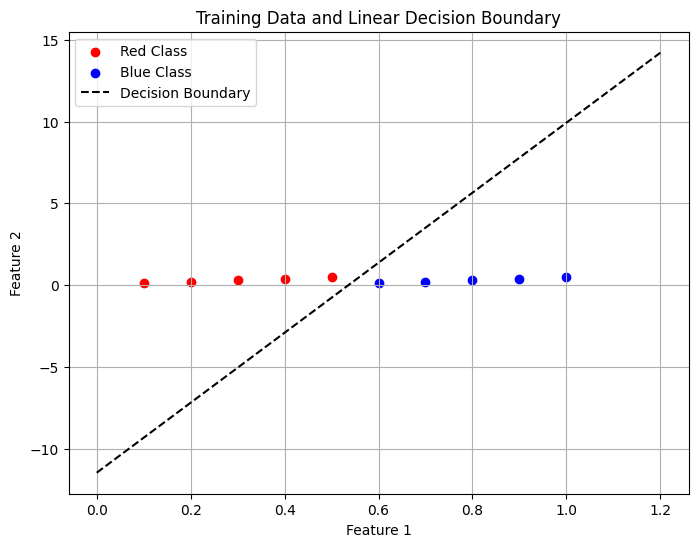

In [16]:
from sklearn.linear_model import LogisticRegression

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Decision boundary computation
def decision_boundary(x):
    return -(model.coef_[0][0] * x + model.intercept_) / model.coef_[0][1]

# Plotting training data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:5, 0], X[:5, 1], color='red', label='Red Class')
plt.scatter(X[5:, 0], X[5:, 1], color='blue', label='Blue Class')

# Plot decision boundary
x_values = np.linspace(0, 1.2, 100)
y_values = decision_boundary(x_values)
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data and Linear Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


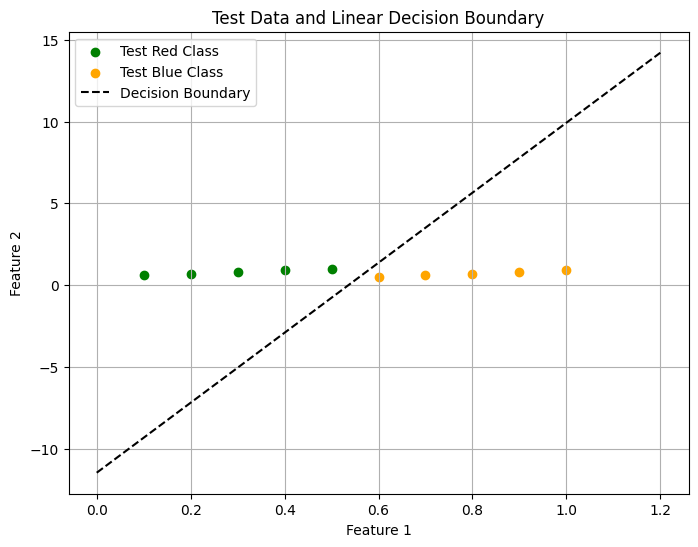

Test Predictions: [0 0 0 0 0 1 1 1 1 1]
True Labels: [1 1 1 1 1 0 0 0 0 0]


In [17]:
# Generate non-linear test data
np.random.seed(1)
X_test = np.array([
    [0.1, 0.6], [0.2, 0.7], [0.3, 0.8], [0.4, 0.9], [0.5, 1.0],  # Points far from the decision boundary
    [0.6, 0.5], [0.7, 0.6], [0.8, 0.7], [0.9, 0.8], [1.0, 0.9]   # Points close to the decision boundary
])
y_test = np.array([1]*5 + [0]*5)  # True labels for non-linear test data

# Predict with the trained model
y_pred = model.predict(X_test)

# Plotting test data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:5, 0], X_test[:5, 1], color='green', label='Test Red Class')
plt.scatter(X_test[5:, 0], X_test[5:, 1], color='orange', label='Test Blue Class')

# Plot decision boundary
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data and Linear Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

# Print predictions
print("Test Predictions:", y_pred)
print("True Labels:", y_test)


In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Example candle data
# Format: [Open, Close, High, Low, Time]
candle_data = np.array([
    [100, 105, 110, 95, 1],
    [102, 100, 108, 98, 2],
    [101, 103, 107, 99, 3],
    # ... more data
])

# Extract features
def extract_features(candles):
    body_size = np.abs(candles[:, 1] - candles[:, 0])
    range_ = candles[:, 2] - candles[:, 3]
    body_ratio = body_size / range_
    return np.column_stack([body_size, body_ratio])

# Prepare features
features = extract_features(candle_data)

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Example classifier
model = LogisticRegression()
# Example labels: 0 for green, 1 for orange (to be replaced with actual labels)
labels = np.array([0, 1, 0])  

# Train classifier
model.fit(features_scaled, labels)

# Predict new data
new_candle = np.array([[104, 107, 112, 101, 4]])  # Example new candle
new_features = extract_features(new_candle)
new_features_scaled = scaler.transform(new_features)
prediction = model.predict(new_features_scaled)

print("Prediction:", "Green" if prediction[0] == 0 else "Orange")


Prediction: Green


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Generate synthetic candle data
np.random.seed(0)

# Generate random values for 20 candles
# Format: [Open, Close, High, Low, Time]
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(10)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+10] for i in range(10)
])

# Generate labels (0 for green, 1 for orange)
# First 10 are green, next 10 are orange
labels = np.array([0]*10 + [1]*10)


In [28]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
def extract_features(candles):
    body_size = np.abs(candles[:, 1] - candles[:, 0])
    range_ = candles[:, 2] - candles[:, 3]
    body_ratio = body_size / range_
    return np.column_stack([body_size, body_ratio])

# Extract features from the synthetic candle data
features = extract_features(candle_data)


In [29]:
features

array([[1.66375862e+00, 8.08481772e-02],
       [2.22239314e+00, 1.43768450e-01],
       [5.80221242e+00, 2.56413965e-01],
       [3.57552077e+00, 1.80226251e-01],
       [8.12401448e+00, 4.25754656e-01],
       [1.79459778e+00, 1.06760914e-01],
       [5.21646595e+00, 4.35182612e-01],
       [1.07186382e+00, 7.19216299e-02],
       [1.12283617e+00, 8.01365106e-02],
       [4.83827415e-02, 2.13900470e-03],
       [9.22475947e+00, 3.49766416e-01],
       [9.96128846e+00, 4.78573037e-01],
       [9.51717580e+00, 4.46481374e-01],
       [1.88632903e+01, 9.21253765e-01],
       [1.39981672e+01, 6.30013079e-01],
       [1.04859444e+01, 4.16415163e-01],
       [8.27857191e+00, 3.03924386e-01],
       [1.74184650e+01, 6.94569248e-01],
       [1.37191557e+01, 5.08102615e-01],
       [1.16261040e+01, 5.33941278e-01]])

In [21]:
# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train logistic regression model
model = LogisticRegression()
model.fit(features_scaled, labels)


LogisticRegression()

In [30]:
features_scaled

array([[-1.09669852, -1.15636336],
       [-0.99497933, -0.88932118],
       [-0.3431465 , -0.41123834],
       [-0.74859454, -0.73458933],
       [ 0.07961977,  0.30746653],
       [-1.07287462, -1.04638619],
       [-0.44980238,  0.34748006],
       [-1.20447393, -1.19424884],
       [-1.19519261, -1.15938377],
       [-1.39083489, -1.49041577],
       [ 0.28004936, -0.01503787],
       [ 0.41416054,  0.53163491],
       [ 0.33329411,  0.39543354],
       [ 2.03508513,  2.41043199],
       [ 1.14921724,  1.174367  ],
       [ 0.50969274,  0.26782846],
       [ 0.10776242, -0.20959766],
       [ 1.77200354,  1.44835214],
       [ 1.09841331,  0.65696245],
       [ 0.71729915,  0.76662524]])

In [22]:
# Make predictions
predictions = model.predict(features_scaled)


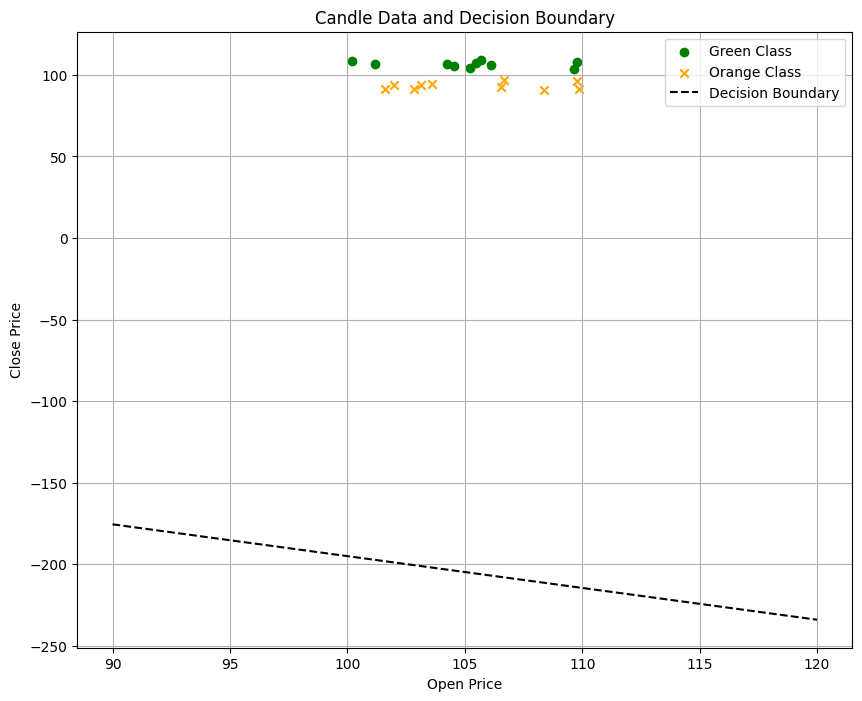

In [23]:
# Define the decision boundary function
def decision_boundary(x):
    return -(model.coef_[0][0] * x + model.intercept_) / model.coef_[0][1]

# Plotting
plt.figure(figsize=(10, 8))

# Plot the candle data
plt.scatter(candle_data[labels == 0][:, 0], candle_data[labels == 0][:, 1], color='green', label='Green Class', marker='o')
plt.scatter(candle_data[labels == 1][:, 0], candle_data[labels == 1][:, 1], color='orange', label='Orange Class', marker='x')

# Plot decision boundary
x_values = np.linspace(90, 120, 100)
y_values = decision_boundary(x_values)
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Candle Data and Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


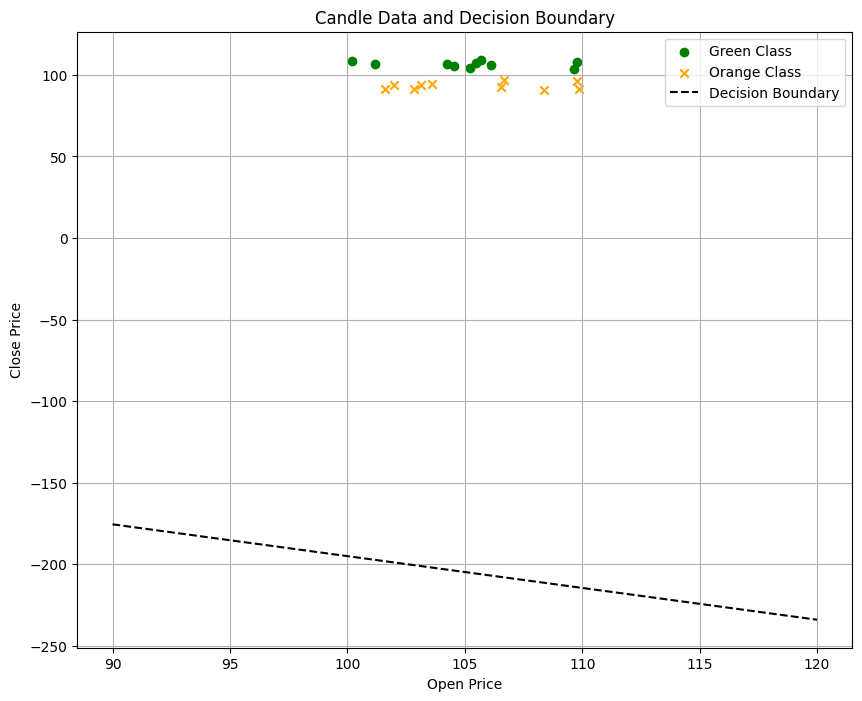

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Generate synthetic candle data
np.random.seed(0)
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(10)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+10] for i in range(10)
])
labels = np.array([0]*10 + [1]*10)

# Feature extraction
def extract_features(candles):
    body_size = np.abs(candles[:, 1] - candles[:, 0])
    range_ = candles[:, 2] - candles[:, 3]
    body_ratio = body_size / range_
    return np.column_stack([body_size, body_ratio])

features = extract_features(candle_data)

# Train logistic regression model
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
model = LogisticRegression()
model.fit(features_scaled, labels)

# Make predictions
predictions = model.predict(features_scaled)

# Plotting
def decision_boundary(x):
    return -(model.coef_[0][0] * x + model.intercept_) / model.coef_[0][1]

plt.figure(figsize=(10, 8))
plt.scatter(candle_data[labels == 0][:, 0], candle_data[labels == 0][:, 1], color='green', label='Green Class', marker='o')
plt.scatter(candle_data[labels == 1][:, 0], candle_data[labels == 1][:, 1], color='orange', label='Orange Class', marker='x')

x_values = np.linspace(90, 120, 100)
y_values = decision_boundary(x_values)
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Candle Data and Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


Epoch [50/500], Loss: 0.1539
Epoch [100/500], Loss: 0.0575
Epoch [150/500], Loss: 0.0079
Epoch [200/500], Loss: 0.0020
Epoch [250/500], Loss: 0.0010
Epoch [300/500], Loss: 0.0006
Epoch [350/500], Loss: 0.0004
Epoch [400/500], Loss: 0.0003
Epoch [450/500], Loss: 0.0002
Epoch [500/500], Loss: 0.0002


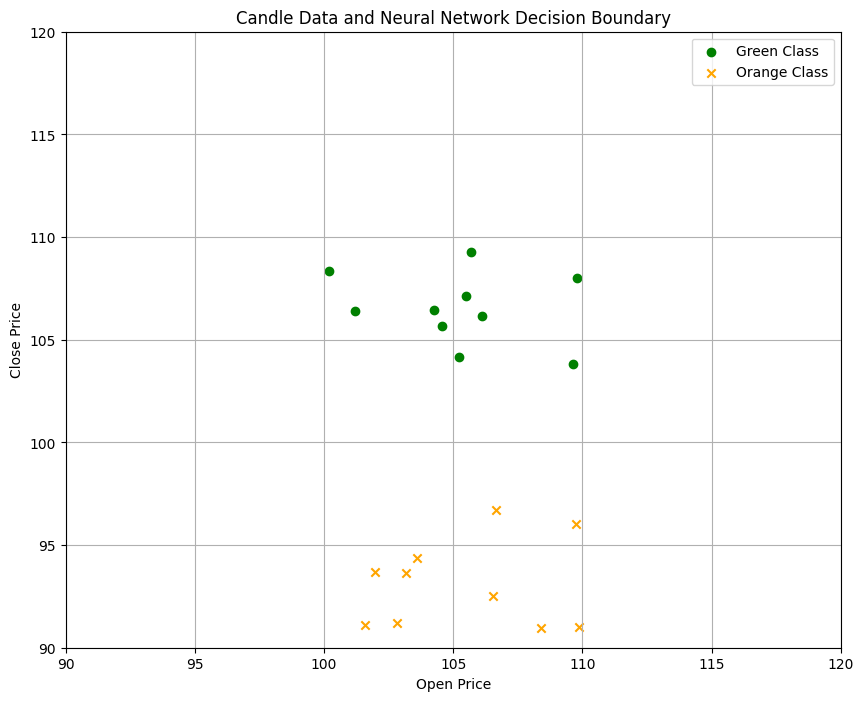

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic candle data
np.random.seed(0)
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(10)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+10] for i in range(10)
])
labels = np.array([0]*10 + [1]*10)

# Feature extraction
def extract_features(candles):
    body_size = np.abs(candles[:, 1] - candles[:, 0])
    range_ = candles[:, 2] - candles[:, 3]
    body_ratio = body_size / range_
    return np.column_stack([body_size, body_ratio])

features = extract_features(candle_data)

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to PyTorch tensors
X = torch.tensor(features_scaled, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.long)

# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 8)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(8, 8)  # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(8, 2)  # Second hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make predictions
with torch.no_grad():
    predictions = model(X)
    predicted_classes = torch.argmax(predictions, dim=1).numpy()

# Plotting
def decision_boundary(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    with torch.no_grad():
        predictions = model(x_tensor).numpy()
    return -(predictions[:, 0] - predictions[:, 1]) / (predictions[:, 0] + predictions[:, 1])

plt.figure(figsize=(10, 8))
plt.scatter(candle_data[labels == 0][:, 0], candle_data[labels == 0][:, 1], color='green', label='Green Class', marker='o')
plt.scatter(candle_data[labels == 1][:, 0], candle_data[labels == 1][:, 1], color='orange', label='Orange Class', marker='x')

# Create a grid to plot the decision boundary
x_values = np.linspace(90, 120, 100)
y_values = np.linspace(90, 120, 100)
xx, yy = np.meshgrid(x_values, y_values)
grid = np.c_[xx.ravel(), yy.ravel()]
decision_values = decision_boundary(grid).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, decision_values, levels=[-1, 0, 1], colors=['orange', 'lightgrey', 'green'], alpha=0.3)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Candle Data and Neural Network Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


Epoch [50/500], Loss: 0.3479
Epoch [100/500], Loss: 0.3237
Epoch [150/500], Loss: 0.2915
Epoch [200/500], Loss: 0.2494
Epoch [250/500], Loss: 0.2003
Epoch [300/500], Loss: 0.1664
Epoch [350/500], Loss: 0.1497
Epoch [400/500], Loss: 0.1405
Epoch [450/500], Loss: 0.1295
Epoch [500/500], Loss: 0.1215
Training Accuracy: 0.9500
Test Accuracy: 0.8000
Number of Training Errors: 4
Number of Test Errors: 4


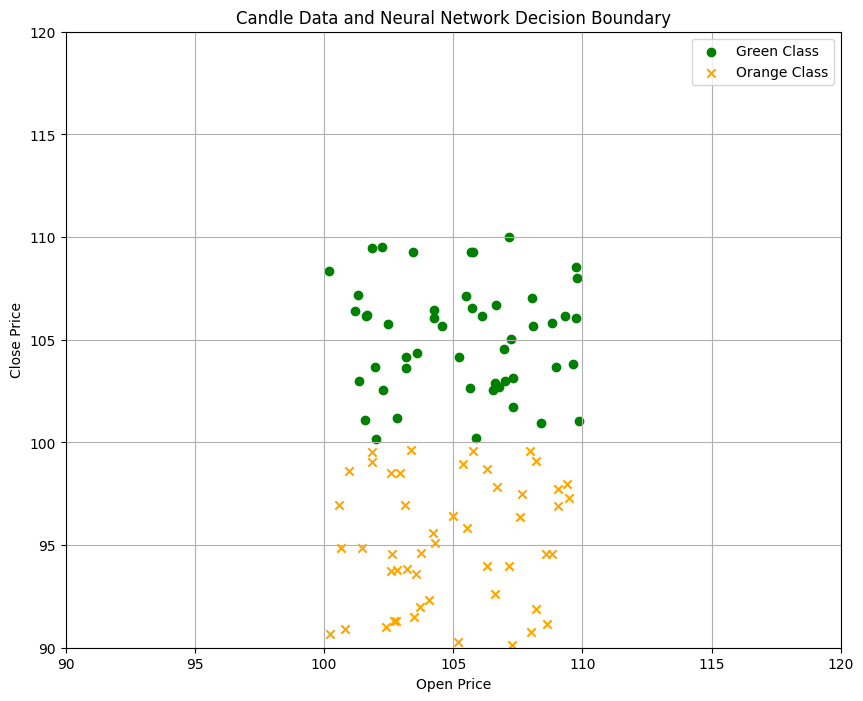

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate synthetic candle data
np.random.seed(0)
num_samples = 100  # Increased number of samples for more realistic results
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(num_samples//2)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+num_samples//2] for i in range(num_samples//2)
])
labels = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

# Feature extraction
def extract_features(candles):
    body_size = np.abs(candles[:, 1] - candles[:, 0])
    range_ = candles[:, 2] - candles[:, 3]
    body_ratio = body_size / range_
    return np.column_stack([body_size, body_ratio])

features = extract_features(candle_data)

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to PyTorch tensors
X = torch.tensor(features_scaled, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.long)

# Split data into training and test sets
split_ratio = 0.8
num_train = int(num_samples * split_ratio)
indices = np.random.permutation(num_samples)
train_indices, test_indices = indices[:num_train], indices[num_train:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 16)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(16, 16)  # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(16, 2)   # Second hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train)
    test_outputs = model(X_test)
    
    _, train_predictions = torch.max(train_outputs, 1)
    _, test_predictions = torch.max(test_outputs, 1)
    
    train_accuracy = (train_predictions == y_train).sum().item() / len(y_train)
    test_accuracy = (test_predictions == y_test).sum().item() / len(y_test)

    # Error analysis
    train_errors = (train_predictions != y_train).nonzero(as_tuple=True)[0]
    test_errors = (test_predictions != y_test).nonzero(as_tuple=True)[0]

    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Number of Training Errors: {len(train_errors)}')
    print(f'Number of Test Errors: {len(test_errors)}')

# Plotting
def decision_boundary(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    with torch.no_grad():
        predictions = model(x_tensor).numpy()
    return -(predictions[:, 0] - predictions[:, 1]) / (predictions[:, 0] + predictions[:, 1])

plt.figure(figsize=(10, 8))
plt.scatter(candle_data[labels == 0][:, 0], candle_data[labels == 0][:, 1], color='green', label='Green Class', marker='o')
plt.scatter(candle_data[labels == 1][:, 0], candle_data[labels == 1][:, 1], color='orange', label='Orange Class', marker='x')

# Create a grid to plot the decision boundary
x_values = np.linspace(90, 120, 100)
y_values = np.linspace(90, 120, 100)
xx, yy = np.meshgrid(x_values, y_values)
grid = np.c_[xx.ravel(), yy.ravel()]
decision_values = decision_boundary(grid).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, decision_values, levels=[-1, 0, 1], colors=['orange', 'lightgrey', 'green'], alpha=0.3)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Candle Data and Neural Network Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


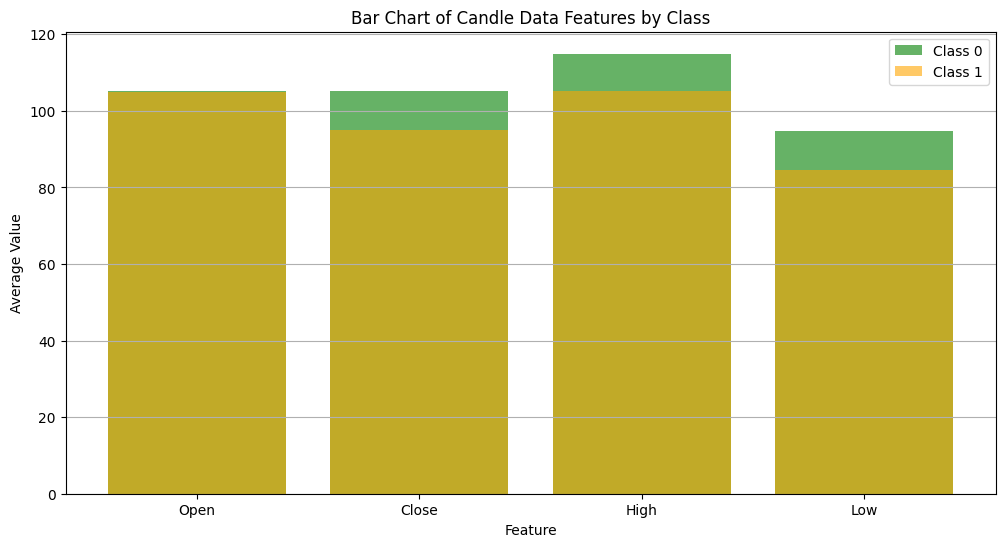

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic candle data
np.random.seed(0)
num_samples = 100  # Number of samples
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(num_samples//2)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+num_samples//2] for i in range(num_samples//2)
])
labels = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

# Extract features for each class
open_prices = candle_data[:, 0]
close_prices = candle_data[:, 1]
high_prices = candle_data[:, 2]
low_prices = candle_data[:, 3]

# Split data by class
class_0 = candle_data[labels == 0]
class_1 = candle_data[labels == 1]

# Prepare data for plotting
def plot_feature_bars(class_data, class_label, color):
    avg_open = np.mean(class_data[:, 0])
    avg_close = np.mean(class_data[:, 1])
    avg_high = np.mean(class_data[:, 2])
    avg_low = np.mean(class_data[:, 3])
    
    features = [avg_open, avg_close, avg_high, avg_low]
    feature_names = ['Open', 'Close', 'High', 'Low']
    
    plt.bar(feature_names, features, color=color, alpha=0.6, label=f'Class {class_label}')
    
# Plotting
plt.figure(figsize=(12, 6))

# Plot for Class 0
plot_feature_bars(class_0, 0, 'green')

# Plot for Class 1
plot_feature_bars(class_1, 1, 'orange')

plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.title('Bar Chart of Candle Data Features by Class')
plt.legend()
plt.grid(axis='y')
plt.show()


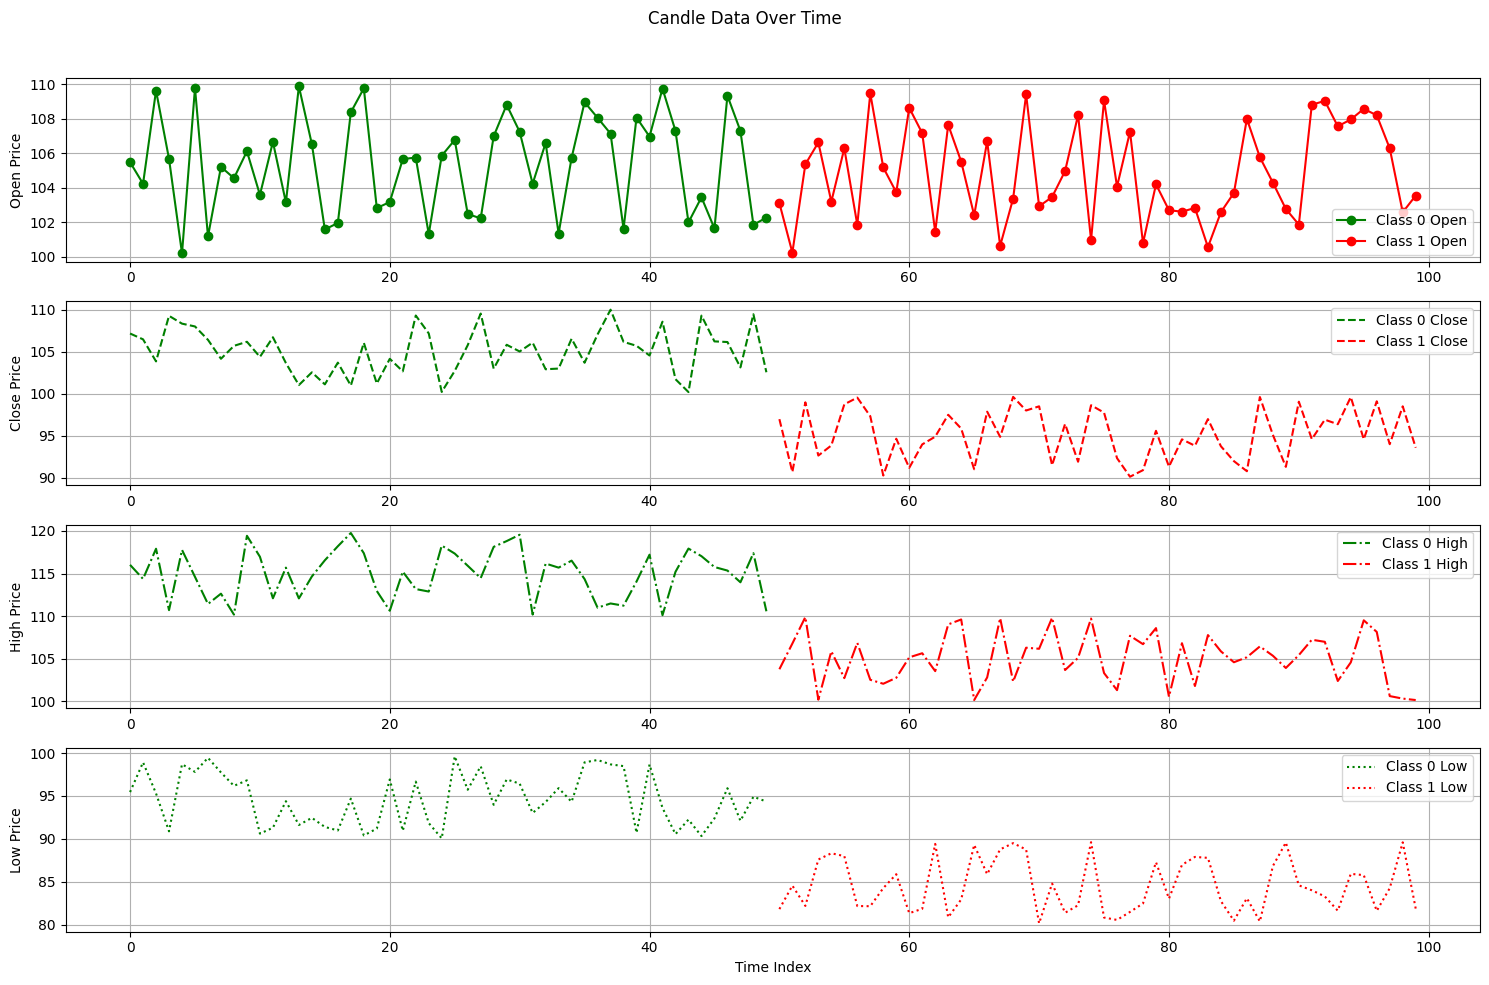

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic candle data
np.random.seed(0)
num_samples = 100  # Number of samples
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(num_samples//2)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+num_samples//2] for i in range(num_samples//2)
])
labels = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

# Extract features
time_indices = candle_data[:, 4]
open_prices = candle_data[:, 0]
close_prices = candle_data[:, 1]
high_prices = candle_data[:, 2]
low_prices = candle_data[:, 3]

# Split data by class
class_0_indices = time_indices[labels == 0]
class_0_open = open_prices[labels == 0]
class_0_close = close_prices[labels == 0]
class_0_high = high_prices[labels == 0]
class_0_low = low_prices[labels == 0]

class_1_indices = time_indices[labels == 1]
class_1_open = open_prices[labels == 1]
class_1_close = close_prices[labels == 1]
class_1_high = high_prices[labels == 1]
class_1_low = low_prices[labels == 1]

# Plotting
plt.figure(figsize=(15, 10))

# Plot open prices
plt.subplot(4, 1, 1)
plt.plot(class_0_indices, class_0_open, 'go-', label='Class 0 Open')
plt.plot(class_1_indices, class_1_open, 'ro-', label='Class 1 Open')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)

# Plot close prices
plt.subplot(4, 1, 2)
plt.plot(class_0_indices, class_0_close, 'g--', label='Class 0 Close')
plt.plot(class_1_indices, class_1_close, 'r--', label='Class 1 Close')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Plot high prices
plt.subplot(4, 1, 3)
plt.plot(class_0_indices, class_0_high, 'g-.', label='Class 0 High')
plt.plot(class_1_indices, class_1_high, 'r-.', label='Class 1 High')
plt.ylabel('High Price')
plt.legend()
plt.grid(True)

# Plot low prices
plt.subplot(4, 1, 4)
plt.plot(class_0_indices, class_0_low, 'g:', label='Class 0 Low')
plt.plot(class_1_indices, class_1_low, 'r:', label='Class 1 Low')
plt.xlabel('Time Index')
plt.ylabel('Low Price')
plt.legend()
plt.grid(True)

plt.suptitle('Candle Data Over Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


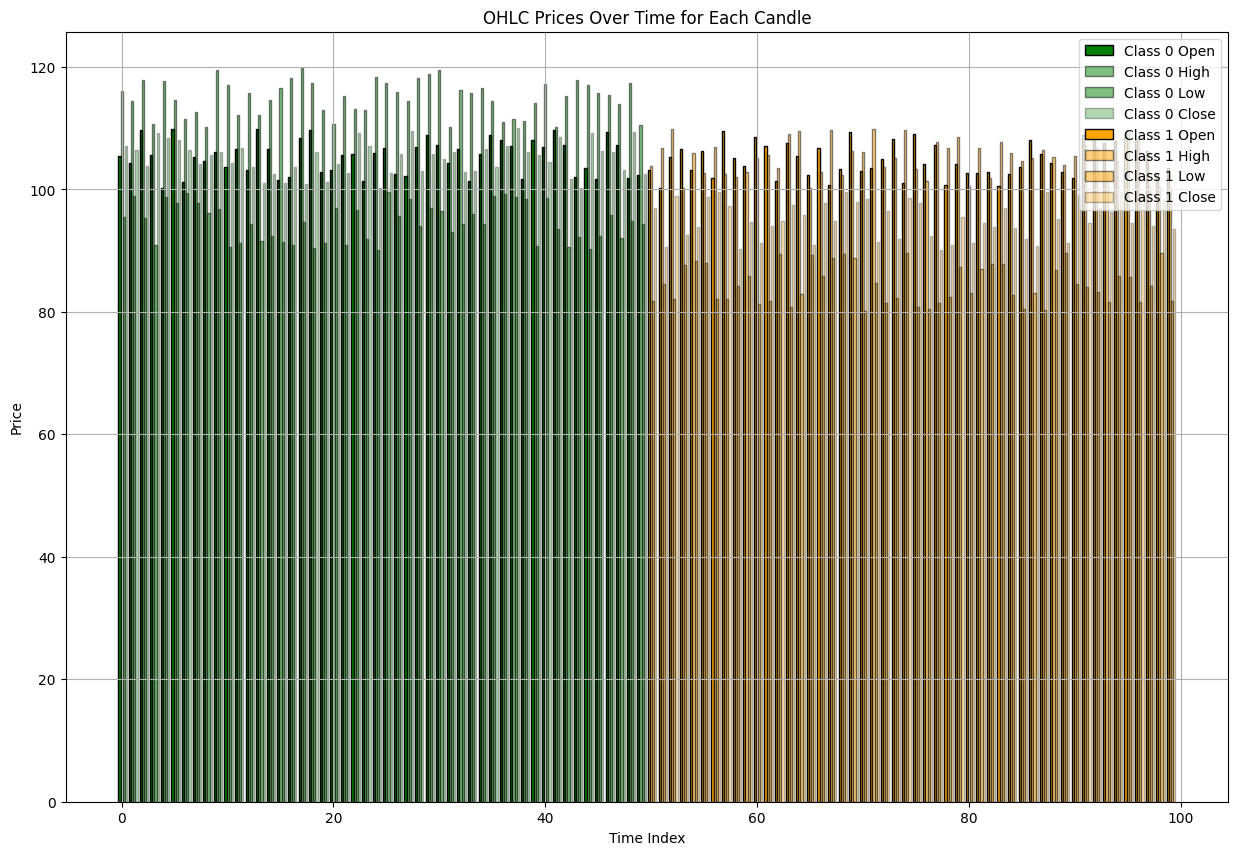

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic candle data
np.random.seed(0)
num_samples = 100  # Number of samples
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(num_samples//2)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+num_samples//2] for i in range(num_samples//2)
])
labels = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

# Extract features
time_indices = candle_data[:, 4]
open_prices = candle_data[:, 0]
close_prices = candle_data[:, 1]
high_prices = candle_data[:, 2]
low_prices = candle_data[:, 3]

# Split data by class
class_0_indices = time_indices[labels == 0]
class_0_open = open_prices[labels == 0]
class_0_close = close_prices[labels == 0]
class_0_high = high_prices[labels == 0]
class_0_low = low_prices[labels == 0]

class_1_indices = time_indices[labels == 1]
class_1_open = open_prices[labels == 1]
class_1_close = close_prices[labels == 1]
class_1_high = high_prices[labels == 1]
class_1_low = low_prices[labels == 1]

# Plotting
plt.figure(figsize=(15, 10))

def plot_candles(indices, open_prices, close_prices, high_prices, low_prices, color, label):
    bar_width = 0.2
    offset = (bar_width * 2) / 2  # Offset to place bars side by side
    
    plt.bar(indices - offset, open_prices, width=bar_width, color=color, edgecolor='black', label=f'{label} Open')
    plt.bar(indices, high_prices, width=bar_width, color=color, alpha=0.5, edgecolor='black', label=f'{label} High')
    plt.bar(indices + offset, low_prices, width=bar_width, color=color, alpha=0.5, edgecolor='black', label=f'{label} Low')
    plt.bar(indices + 2 * offset, close_prices, width=bar_width, color=color, alpha=0.3, edgecolor='black', label=f'{label} Close')

# Plot for Class 0
plot_candles(class_0_indices, class_0_open, class_0_close, class_0_high, class_0_low, 'green', 'Class 0')

# Plot for Class 1
plot_candles(class_1_indices, class_1_open, class_1_close, class_1_high, class_1_low, 'orange', 'Class 1')

plt.xlabel('Time Index')
plt.ylabel('Price')
plt.title('OHLC Prices Over Time for Each Candle')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
import numpy as np

def reverse_features(body_size, body_ratio, range_):
    # Reconstruct Body Size from Body Ratio
    body_size_reconstructed = body_ratio * range_
    
    # Calculate the High and Low values
    low = np.zeros(len(range_))
    high = np.zeros(len(range_))
    
    for i in range(len(range_)):
        low[i] = (body_size_reconstructed[i] - range_[i] / 2)
        high[i] = (body_size_reconstructed[i] + range_[i] / 2)
    
    return low, high

# Example feature data
body_size = np.array([10, 12, 15])
body_ratio = np.array([0.5, 0.6, 0.7])
range_ = np.array([20, 22, 25])

# Reverse extraction
low, high = reverse_features(body_size, body_ratio, range_)

print("Low Prices:", low)
print("High Prices:", high)


Low Prices: [0.  2.2 5. ]
High Prices: [20.  24.2 30. ]


In [38]:
# Generate synthetic candle data
np.random.seed(42)
num_samples = 100  # Increased number of samples for more realistic results
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(num_samples//2)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+num_samples//2] for i in range(num_samples//2)
])
labels = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

# Feature extraction
def extract_features(candles):
    body_size = np.abs(candles[:, 1] - candles[:, 0])
    range_ = candles[:, 2] - candles[:, 3]
    body_ratio = body_size / range_
    return np.column_stack([body_size, body_ratio])

features = extract_features(candle_data)
print(features)

[[5.76174188e+00 2.70081381e-01]
 [2.41201062e-04 2.02365594e-05]
 [1.06957566e+00 1.01798941e-01]
 [6.20103530e+00 3.10296829e-01]
 [2.20514189e+00 1.03009554e-01]
 [4.72359034e+00 2.45281572e-01]
 [3.29105977e+00 1.95264207e-01]
 [5.45964156e+00 2.24029344e-01]
 [8.83833944e+00 4.09706904e-01]
 [2.06941655e+00 9.22166795e-02]
 [3.73138675e+00 3.31658740e-01]
 [4.03742303e+00 2.25347511e-01]
 [3.61855824e+00 1.64895772e-01]
 [4.46715911e-01 2.66532846e-02]
 [1.07490360e+00 6.24981397e-02]
 [1.17328258e+00 4.74631912e-02]
 [2.61761573e+00 1.95530176e-01]
 [9.12336293e+00 3.54507861e-01]
 [8.09939311e+00 4.09504886e-01]
 [6.97225695e+00 3.10901066e-01]
 [2.39805299e+00 1.05765052e-01]
 [1.42010003e-01 6.78808302e-03]
 [4.14997817e+00 2.95088689e-01]
 [1.99507851e+00 8.76121292e-02]
 [9.51918110e-01 4.96429914e-02]
 [6.04981226e+00 3.35023897e-01]
 [6.58274245e+00 3.97789220e-01]
 [1.51818256e+00 7.13253954e-02]
 [1.21577273e+00 6.90018129e-02]
 [6.17102018e+00 2.62237644e-01]
 [8.865114

In [52]:
import numpy as np

np.random.seed(42)

def reverse_features(body_size, body_ratio, range_):
    # Reconstruct Body Size from Body Ratio
    body_size_reconstructed = body_ratio * range_
    
    # Initialize arrays for reconstructed OHLC values
    open_prices = np.zeros(len(body_size_reconstructed))
    close_prices = np.zeros(len(body_size_reconstructed))
    high_prices = np.zeros(len(body_size_reconstructed))
    low_prices = np.zeros(len(body_size_reconstructed))
    
    for i in range(len(body_size_reconstructed)):
        # Body Size and Range for this sample
        body_size_i = body_size_reconstructed[i]
        range_i = range_[i]
        
        # Assuming Close > Open, adjust as needed
        open_prices[i] = np.random.uniform(90, 100)  # Randomly initializing Open price for simplicity
        close_prices[i] = open_prices[i] + body_size_i
        high_prices[i] = close_prices[i] + range_i / 2
        low_prices[i] = open_prices[i] - range_i / 2
        
    return open_prices, high_prices, low_prices, close_prices

# Generate synthetic candle data
#np.random.seed(42)
num_samples = 100  # Number of samples
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(num_samples//2)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+num_samples//2] for i in range(num_samples//2)
])
labels = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

# Feature extraction
def extract_features(candles):
    body_size = np.abs(candles[:, 1] - candles[:, 0])
    range_ = candles[:, 2] - candles[:, 3]
    body_ratio = body_size / range_
    return np.column_stack([body_size, body_ratio, range_])

features = extract_features(candle_data)

# Reverse feature extraction
body_size = features[:, 0]
body_ratio = features[:, 1]
range_ = features[:, 2]

open_prices, high_prices, low_prices, close_prices = reverse_features(body_size, body_ratio, range_)

# Print some results for verification
print("Original Features:")
print(features[:5])
print("Reconstructed OHLC Prices:")
print(np.column_stack([open_prices, high_prices, low_prices, close_prices])[:5])


Original Features:
[[5.76174188e+00 2.70081381e-01 2.13333546e+01]
 [2.41201062e-04 2.02365594e-05 1.19190747e+01]
 [1.06957566e+00 1.01798941e-01 1.05067464e+01]
 [6.20103530e+00 3.10296829e-01 1.99842046e+01]
 [2.20514189e+00 1.03009554e-01 2.14071588e+01]]
Reconstructed OHLC Prices:
[[ 91.03123869 107.45965785  80.3645614   96.79298056]
 [ 99.02552907 104.9853076   93.06599173  99.02577027]
 [ 95.05252372 101.3754726   89.79915051  96.12209939]
 [ 98.26457466 114.45771225  88.27247237 104.46560996]
 [ 93.20049601 106.10921729  82.49691662  95.4056379 ]]


In [54]:
features[:, 1][:10]

array([2.70081381e-01, 2.02365594e-05, 1.01798941e-01, 3.10296829e-01,
       1.03009554e-01, 2.45281572e-01, 1.95264207e-01, 2.24029344e-01,
       4.09706904e-01, 9.22166795e-02])

In [53]:
candle_data[:5]

array([[103.74540119, 109.50714306, 117.31993942,  95.98658484,
          0.        ],
       [101.5601864 , 101.5599452 , 110.58083612,  98.66176146,
          1.        ],
       [106.01115012, 107.08072578, 110.20584494,  99.69909852,
          2.        ],
       [108.32442641, 102.12339111, 111.81824967,  91.8340451 ,
          3.        ],
       [103.04242243, 105.24756432, 114.31945019,  92.9122914 ,
          4.        ]])

In [56]:
import numpy as np
from scipy.optimize import minimize

# Generate synthetic candle data
np.random.seed(42)
num_samples = 100  # Number of samples
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(num_samples//2)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+num_samples//2] for i in range(num_samples//2)
])
labels = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

# Feature extraction
def extract_features(candles):
    body_size = np.abs(candles[:, 1] - candles[:, 0])
    range_ = candles[:, 2] - candles[:, 3]
    body_ratio = body_size / range_
    return np.column_stack([body_size, body_ratio, range_])

features = extract_features(candle_data)

# Objective function to minimize
def objective(params, body_size, body_ratio, range_):
    num_samples = len(body_size)
    
    # Reshape params into Open, Close, High, Low
    open_prices = params[:num_samples]
    close_prices = params[num_samples:2*num_samples]
    high_prices = params[2*num_samples:3*num_samples]
    low_prices = params[3*num_samples:]
    
    # Calculate features from the current OHLC values
    calc_body_size = np.abs(close_prices - open_prices)
    calc_range = high_prices - low_prices
    calc_body_ratio = calc_body_size / calc_range
    
    # Calculate the difference between extracted and calculated features
    loss_body_size = np.sum((body_size - calc_body_size) ** 2)
    loss_range = np.sum((range_ - calc_range) ** 2)
    loss_body_ratio = np.sum((body_ratio - calc_body_ratio) ** 2)
    
    # Total loss
    total_loss = loss_body_size + loss_range + loss_body_ratio
    return total_loss

# Initial guess for Open, Close, High, Low
initial_params = np.concatenate([
    np.random.uniform(90, 100, num_samples),  # Initial Open prices
    np.random.uniform(100, 110, num_samples),  # Initial Close prices
    np.random.uniform(110, 120, num_samples),  # Initial High prices
    np.random.uniform(80, 90, num_samples)     # Initial Low prices
])

# Extract features
body_size = features[:, 0]
body_ratio = features[:, 1]
range_ = features[:, 2]

# Optimize
result = minimize(
    objective, initial_params, args=(body_size, body_ratio, range_),
    method='L-BFGS-B', options={'disp': True}
)

# Reconstructed OHLC values
optimized_params = result.x
num_samples = len(body_size)
open_prices = optimized_params[:num_samples]
close_prices = optimized_params[num_samples:2*num_samples]
high_prices = optimized_params[2*num_samples:3*num_samples]
low_prices = optimized_params[3*num_samples:]

# Print results
print("Original Features:")
print(features[:5])
print("Reconstructed OHLC Prices:")
print(np.column_stack([open_prices, high_prices, low_prices, close_prices])[:5])


Original Features:
[[5.76174188e+00 2.70081381e-01 2.13333546e+01]
 [2.41201062e-04 2.02365594e-05 1.19190747e+01]
 [1.06957566e+00 1.01798941e-01 1.05067464e+01]
 [6.20103530e+00 3.10296829e-01 1.99842046e+01]
 [2.20514189e+00 1.03009554e-01 2.14071588e+01]]
Reconstructed OHLC Prices:
[[ 96.12564792 109.17429196  87.84093739 101.88738975]
 [102.19356432 102.61159896  90.6925242  102.1933233 ]
 [ 98.53910421 102.82134054  92.31459403  99.60868007]
 [100.10084349 106.10747531  86.1232707  106.3018788 ]
 [ 98.92132515 106.62352708  85.21636828 101.12646698]]


In [57]:
candle_data[:5]

array([[103.74540119, 109.50714306, 117.31993942,  95.98658484,
          0.        ],
       [101.5601864 , 101.5599452 , 110.58083612,  98.66176146,
          1.        ],
       [106.01115012, 107.08072578, 110.20584494,  99.69909852,
          2.        ],
       [108.32442641, 102.12339111, 111.81824967,  91.8340451 ,
          3.        ],
       [103.04242243, 105.24756432, 114.31945019,  92.9122914 ,
          4.        ]])

In [58]:
# chain rule

In [65]:
import numpy as np
import torch
import torch.optim as optim

# Generate synthetic candle data
np.random.seed(42)
num_samples = 100  # Number of samples
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(num_samples//2)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+num_samples//2] for i in range(num_samples//2)
])
labels = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

# Feature extraction
def extract_features(candles):
    body_size = np.abs(candles[:, 1] - candles[:, 0])
    range_ = candles[:, 2] - candles[:, 3]
    body_ratio = body_size / range_
    return np.column_stack([body_size, body_ratio, range_])

features = extract_features(candle_data)

# Convert features to torch tensors
body_size = torch.tensor(features[:, 0], dtype=torch.float32, requires_grad=False)
body_ratio = torch.tensor(features[:, 1], dtype=torch.float32, requires_grad=False)
range_ = torch.tensor(features[:, 2], dtype=torch.float32, requires_grad=False)

# Define the optimization model
class OHLCReconstructor(torch.nn.Module):
    def __init__(self, num_samples):
        super(OHLCReconstructor, self).__init__()
        self.open_prices = torch.nn.Parameter(torch.rand(num_samples) * 10 + 90)  # Initialize Open prices
        self.close_prices = torch.nn.Parameter(torch.rand(num_samples) * 10 + 100)  # Initialize Close prices
        self.high_prices = torch.nn.Parameter(torch.rand(num_samples) * 10 + 110)  # Initialize High prices
        self.low_prices = torch.nn.Parameter(torch.rand(num_samples) * 10 + 80)   # Initialize Low prices

    def forward(self):
        body_size = torch.abs(self.close_prices - self.open_prices)
        range_ = self.high_prices - self.low_prices
        body_ratio = body_size / range_
        return body_size, body_ratio, range_

# Initialize the model and optimizer
model = OHLCReconstructor(num_samples)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
def loss_fn(body_size, body_ratio, range_, model):
    calc_body_size, calc_body_ratio, calc_range = model()
    loss_body_size = torch.mean((calc_body_size - body_size) ** 2)
    loss_body_ratio = torch.mean((calc_body_ratio - body_ratio) ** 2)
    loss_range = torch.mean((calc_range - range_) ** 2)
    return loss_body_size + loss_body_ratio + loss_range

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    loss = loss_fn(body_size, body_ratio, range_, model)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Extract optimized OHLC values
open_prices = model.open_prices.detach().numpy()
close_prices = model.close_prices.detach().numpy()
high_prices = model.high_prices.detach().numpy()
low_prices = model.low_prices.detach().numpy()

# Print results
print("Original Features:")
print(features[:5])
print("Reconstructed OHLC Prices:")
print(np.column_stack([open_prices, high_prices, low_prices, close_prices])[:5])


Epoch 0, Loss: 197.14419555664062
Epoch 100, Loss: 190.5635223388672
Epoch 200, Loss: 184.20956420898438
Epoch 300, Loss: 178.06692504882812
Epoch 400, Loss: 172.12489318847656
Epoch 500, Loss: 166.3744354248047
Epoch 600, Loss: 160.80764770507812
Epoch 700, Loss: 155.4163055419922
Epoch 800, Loss: 150.19322204589844
Epoch 900, Loss: 145.13238525390625
Epoch 1000, Loss: 140.22866821289062
Epoch 1100, Loss: 135.474365234375
Epoch 1200, Loss: 130.86764526367188
Epoch 1300, Loss: 126.400634765625
Epoch 1400, Loss: 122.07022094726562
Epoch 1500, Loss: 117.87229919433594
Epoch 1600, Loss: 113.8022689819336
Epoch 1700, Loss: 109.85540771484375
Epoch 1800, Loss: 106.02951049804688
Epoch 1900, Loss: 102.31904602050781
Epoch 2000, Loss: 98.72262573242188
Epoch 2100, Loss: 95.23468017578125
Epoch 2200, Loss: 91.85388946533203
Epoch 2300, Loss: 88.57655334472656
Epoch 2400, Loss: 85.39871978759766
Epoch 2500, Loss: 82.31950378417969
Epoch 2600, Loss: 79.33409118652344
Epoch 2700, Loss: 76.4421157

In [66]:
candle_data[:5]

array([[103.74540119, 109.50714306, 117.31993942,  95.98658484,
          0.        ],
       [101.5601864 , 101.5599452 , 110.58083612,  98.66176146,
          1.        ],
       [106.01115012, 107.08072578, 110.20584494,  99.69909852,
          2.        ],
       [108.32442641, 102.12339111, 111.81824967,  91.8340451 ,
          3.        ],
       [103.04242243, 105.24756432, 114.31945019,  92.9122914 ,
          4.        ]])

In [67]:
import numpy as np

def quantize_values(values, num_bins):
    """
    Quantize continuous values into discrete bins.
    
    Args:
        values (np.array): Continuous values to be quantized.
        num_bins (int): Number of discrete bins.

    Returns:
        np.array: Quantized values.
    """
    min_val = np.min(values)
    max_val = np.max(values)
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    quantized_values = np.digitize(values, bin_edges) - 1  # Digitize returns 1-based index
    return quantized_values

# Example usage
num_bins = 10  # Number of bins for quantization
open_quantized = quantize_values(candle_data[:, 0], num_bins)
close_quantized = quantize_values(candle_data[:, 1], num_bins)
high_quantized = quantize_values(candle_data[:, 2], num_bins)
low_quantized = quantize_values(candle_data[:, 3], num_bins)


In [68]:
# Combine quantized OHLC values
quantized_data = np.column_stack([
    open_quantized, close_quantized, high_quantized, low_quantized
])

# Create training and validation datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(quantized_data, labels, test_size=0.2, random_state=42)

# Optionally standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

# Model parameters
input_size = X_train_scaled.shape[1]
hidden_size = 50
output_size = 2  # Number of classes

# Initialize model, loss function, and optimizer
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Print loss every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy on test set: {accuracy:.4f}')


Epoch [5/20], Loss: 0.7078
Epoch [10/20], Loss: 0.6748
Epoch [15/20], Loss: 0.6433
Epoch [20/20], Loss: 0.6134
Accuracy on test set: 1.0000


In [71]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Define the quantization function
def quantize_values(values, num_bins):
    min_val = np.min(values)
    max_val = np.max(values)
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    quantized_values = np.digitize(values, bin_edges) - 1  # Digitize returns 1-based index
    return quantized_values

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

# Generate synthetic OHLC data (new test data)
np.random.seed(42)
num_test_samples = 10
new_candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(110, 120), np.random.uniform(80, 90)]
    for _ in range(num_test_samples)
])

# Quantize the new OHLC data
num_bins = 10
open_quantized = quantize_values(new_candle_data[:, 0], num_bins)
close_quantized = quantize_values(new_candle_data[:, 1], num_bins)
high_quantized = quantize_values(new_candle_data[:, 2], num_bins)
low_quantized = quantize_values(new_candle_data[:, 3], num_bins)

# Combine quantized OHLC values
new_quantized_data = np.column_stack([
    open_quantized, close_quantized, high_quantized, low_quantized
])

# Standardize the new test data
scaler = StandardScaler()
new_quantized_data_scaled = scaler.fit_transform(new_quantized_data)

# Convert new data to PyTorch tensor
new_data_tensor = torch.tensor(new_quantized_data_scaled, dtype=torch.float32)

# Load the trained model (assuming it's saved and loaded appropriately)
input_size = new_quantized_data_scaled.shape[1]
hidden_size = 50
output_size = 2
model = SimpleNN(input_size, hidden_size, output_size)

# For demonstration, assume the model is already trained. You would typically load it from a file.
# model.load_state_dict(torch.load('model.pth'))

# Make predictions
model.eval()
with torch.no_grad():
    test_outputs = model(new_data_tensor)
    _, predicted = torch.max(test_outputs, 1)

# Print the results
print("New OHLC Data:")
print(new_candle_data)
print("Quantized OHLC Data:")
print(new_quantized_data)
print("Predictions (0: Green, 1: Orange):")
print(predicted.numpy())


New OHLC Data:
[[103.74540119  99.50714306 117.31993942  85.98658484]
 [101.5601864   91.5599452  110.58083612  88.66176146]
 [106.01115012  97.08072578 110.20584494  89.69909852]
 [108.32442641  92.12339111 111.81824967  81.8340451 ]
 [103.04242243  95.24756432 114.31945019  82.9122914 ]
 [106.11852895  91.39493861 112.92144649  83.66361843]
 [104.56069984  97.85175961 111.99673782  85.14234438]
 [105.92414569  90.46450413 116.07544852  81.70524124]
 [100.65051593  99.48885537 119.65632033  88.08397348]
 [103.04613769  90.97672114 116.84233027  84.40152494]]
Quantized OHLC Data:
[[ 4 10  7  5]
 [ 1  1  0  8]
 [ 6  7  0 10]
 [10  1  1  0]
 [ 3  5  4  1]
 [ 7  1  2  2]
 [ 5  8  1  4]
 [ 6  0  6  0]
 [ 0  9 10  7]
 [ 3  0  7  3]]
Predictions (0: Green, 1: Orange):
[0 0 0 1 0 1 0 1 0 0]


In [72]:
new_candle_data[:5]

array([[103.74540119,  99.50714306, 117.31993942,  85.98658484],
       [101.5601864 ,  91.5599452 , 110.58083612,  88.66176146],
       [106.01115012,  97.08072578, 110.20584494,  89.69909852],
       [108.32442641,  92.12339111, 111.81824967,  81.8340451 ],
       [103.04242243,  95.24756432, 114.31945019,  82.9122914 ]])

In [73]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

# Define the quantization function
def quantize_values(values, num_bins):
    min_val = np.min(values)
    max_val = np.max(values)
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    quantized_values = np.digitize(values, bin_edges) - 1  # Digitize returns 1-based index
    return quantized_values

# Generate synthetic OHLC data
np.random.seed(42)
num_samples = 100
candle_data = np.array([
    [np.random.uniform(100, 110), np.random.uniform(100, 110), np.random.uniform(110, 120), np.random.uniform(90, 100), i] for i in range(num_samples//2)
] + [
    [np.random.uniform(100, 110), np.random.uniform(90, 100), np.random.uniform(100, 110), np.random.uniform(80, 90), i+num_samples//2] for i in range(num_samples//2)
])
labels = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

# Quantize OHLC data
num_bins = 10
open_quantized = quantize_values(candle_data[:, 0], num_bins)
close_quantized = quantize_values(candle_data[:, 1], num_bins)
high_quantized = quantize_values(candle_data[:, 2], num_bins)
low_quantized = quantize_values(candle_data[:, 3], num_bins)

# Combine quantized OHLC values
quantized_data = np.column_stack([
    open_quantized, close_quantized, high_quantized, low_quantized
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(quantized_data, labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Initialize the model, loss function, and optimizer
input_size = X_train_scaled.shape[1]
hidden_size = 50
output_size = 2
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with metrics
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Calculate training accuracy
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / y_train_tensor.size(0)
    
    # Print loss and accuracy every epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    correct = (predicted == y_test_tensor).sum().item()
    accuracy = correct / y_test_tensor.size(0)
    
    # Print evaluation metrics
    print(f'\nTest Loss: {test_loss.item():.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Number of test samples: {y_test_tensor.size(0)}')
    print(f'Number of correct predictions: {correct}')

    # Calculate and print confusion matrix
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test_tensor.numpy(), predicted.numpy())
    print('Confusion Matrix:')
    print(conf_matrix)


Epoch [1/20], Loss: 0.6765, Accuracy: 0.5250
Epoch [2/20], Loss: 0.6700, Accuracy: 0.5250
Epoch [3/20], Loss: 0.6635, Accuracy: 0.5250
Epoch [4/20], Loss: 0.6571, Accuracy: 0.5250
Epoch [5/20], Loss: 0.6507, Accuracy: 0.5250
Epoch [6/20], Loss: 0.6444, Accuracy: 0.5250
Epoch [7/20], Loss: 0.6381, Accuracy: 0.5250
Epoch [8/20], Loss: 0.6318, Accuracy: 0.5250
Epoch [9/20], Loss: 0.6256, Accuracy: 0.5750
Epoch [10/20], Loss: 0.6195, Accuracy: 0.6250
Epoch [11/20], Loss: 0.6134, Accuracy: 0.7125
Epoch [12/20], Loss: 0.6074, Accuracy: 0.7625
Epoch [13/20], Loss: 0.6014, Accuracy: 0.8875
Epoch [14/20], Loss: 0.5956, Accuracy: 0.9625
Epoch [15/20], Loss: 0.5898, Accuracy: 0.9625
Epoch [16/20], Loss: 0.5840, Accuracy: 0.9750
Epoch [17/20], Loss: 0.5783, Accuracy: 0.9750
Epoch [18/20], Loss: 0.5728, Accuracy: 1.0000
Epoch [19/20], Loss: 0.5672, Accuracy: 1.0000
Epoch [20/20], Loss: 0.5618, Accuracy: 1.0000

Test Loss: 0.5480
Test Accuracy: 1.0000
Number of test samples: 20
Number of correct pre

In [74]:
import numpy as np

# Define the quantized OHLC data
quantized_ohlc_data = np.array([
    [4, 10, 7, 5],
    [1, 1, 0, 8],
    [6, 7, 0, 10],
    [10, 1, 1, 0],
    [3, 5, 4, 1],
    [7, 1, 2, 2],
    [5, 8, 1, 4],
    [6, 0, 6, 0],
    [0, 9, 10, 7],
    [3, 0, 7, 3]
])

# Function to convert a list of quantized OHLC values into a single 32-bit integer
def pack_to_32bit_integer(ohlc_values):
    packed_value = 0
    for i, value in enumerate(ohlc_values):
        packed_value |= (value << (i * 8))  # Shift and combine each value
    return packed_value

# Convert each row to a 32-bit integer
packed_data = np.array([pack_to_32bit_integer(row) for row in quantized_ohlc_data])

# Print results
for original, packed in zip(quantized_ohlc_data, packed_data):
    print(f'Quantized OHLC Data: {original}')
    print(f'Packed 32-bit Integer: {packed} (Binary: {bin(packed)})\n')


Quantized OHLC Data: [ 4 10  7  5]
Packed 32-bit Integer: 84347396 (Binary: 0b101000001110000101000000100)

Quantized OHLC Data: [1 1 0 8]
Packed 32-bit Integer: 134217985 (Binary: 0b1000000000000000000100000001)

Quantized OHLC Data: [ 6  7  0 10]
Packed 32-bit Integer: 167773958 (Binary: 0b1010000000000000011100000110)

Quantized OHLC Data: [10  1  1  0]
Packed 32-bit Integer: 65802 (Binary: 0b10000000100001010)

Quantized OHLC Data: [3 5 4 1]
Packed 32-bit Integer: 17040643 (Binary: 0b1000001000000010100000011)

Quantized OHLC Data: [7 1 2 2]
Packed 32-bit Integer: 33685767 (Binary: 0b10000000100000000100000111)

Quantized OHLC Data: [5 8 1 4]
Packed 32-bit Integer: 67176453 (Binary: 0b100000000010000100000000101)

Quantized OHLC Data: [6 0 6 0]
Packed 32-bit Integer: 393222 (Binary: 0b1100000000000000110)

Quantized OHLC Data: [ 0  9 10  7]
Packed 32-bit Integer: 118098176 (Binary: 0b111000010100000100100000000)

Quantized OHLC Data: [3 0 7 3]
Packed 32-bit Integer: 50790403 (Binar

In [75]:
import numpy as np

# Function to unpack a 32-bit integer into the original quantized OHLC values
def unpack_from_32bit_integer(packed_value):
    # Extract each 8-bit value
    value1 = (packed_value >> 0) & 0xFF
    value2 = (packed_value >> 8) & 0xFF
    value3 = (packed_value >> 16) & 0xFF
    value4 = (packed_value >> 24) & 0xFF
    return [value1, value2, value3, value4]

# Example packed data
packed_data = np.array([
    3348656, 134, 3942476, 16961, 2006901, 9207476, 149964, 1073832960, 9303, 16453
])

# Unpack each 32-bit integer to get the original quantized OHLC values
unpacked_data = np.array([unpack_from_32bit_integer(packed) for packed in packed_data])

# Print results
for packed, original in zip(packed_data, unpacked_data):
    print(f'Packed 32-bit Integer: {packed} (Binary: {bin(packed)})')
    print(f'Unpacked Quantized OHLC Data: {original}\n')


Packed 32-bit Integer: 3348656 (Binary: 0b1100110001100010110000)
Unpacked Quantized OHLC Data: [176  24  51   0]

Packed 32-bit Integer: 134 (Binary: 0b10000110)
Unpacked Quantized OHLC Data: [134   0   0   0]

Packed 32-bit Integer: 3942476 (Binary: 0b1111000010100001001100)
Unpacked Quantized OHLC Data: [76 40 60  0]

Packed 32-bit Integer: 16961 (Binary: 0b100001001000001)
Unpacked Quantized OHLC Data: [65 66  0  0]

Packed 32-bit Integer: 2006901 (Binary: 0b111101001111101110101)
Unpacked Quantized OHLC Data: [117 159  30   0]

Packed 32-bit Integer: 9207476 (Binary: 0b100011000111111010110100)
Unpacked Quantized OHLC Data: [180 126 140   0]

Packed 32-bit Integer: 149964 (Binary: 0b100100100111001100)
Unpacked Quantized OHLC Data: [204  73   2   0]

Packed 32-bit Integer: 1073832960 (Binary: 0b1000000000000010110010000000000)
Unpacked Quantized OHLC Data: [  0 100   1  64]

Packed 32-bit Integer: 9303 (Binary: 0b10010001010111)
Unpacked Quantized OHLC Data: [87 36  0  0]

Packed 

In [77]:
xss = [4, 10,  7,  5]

In [79]:
xs_r = pack_to_32bit_integer(xss)
xs_r

84347396

In [80]:
unpack_from_32bit_integer(xs_r)

[4, 10, 7, 5]

Training with Xavier Initialization...


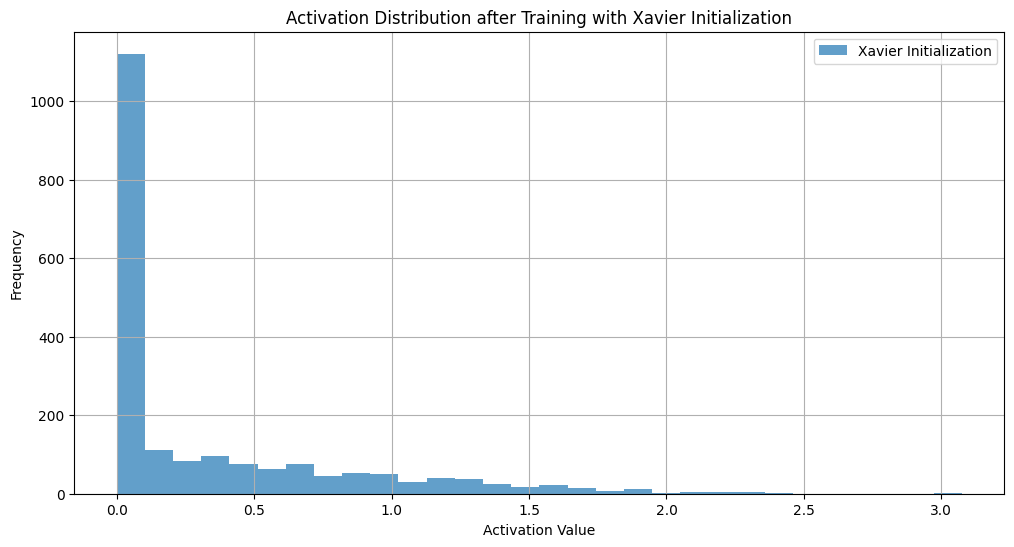

Training with Random Initialization...


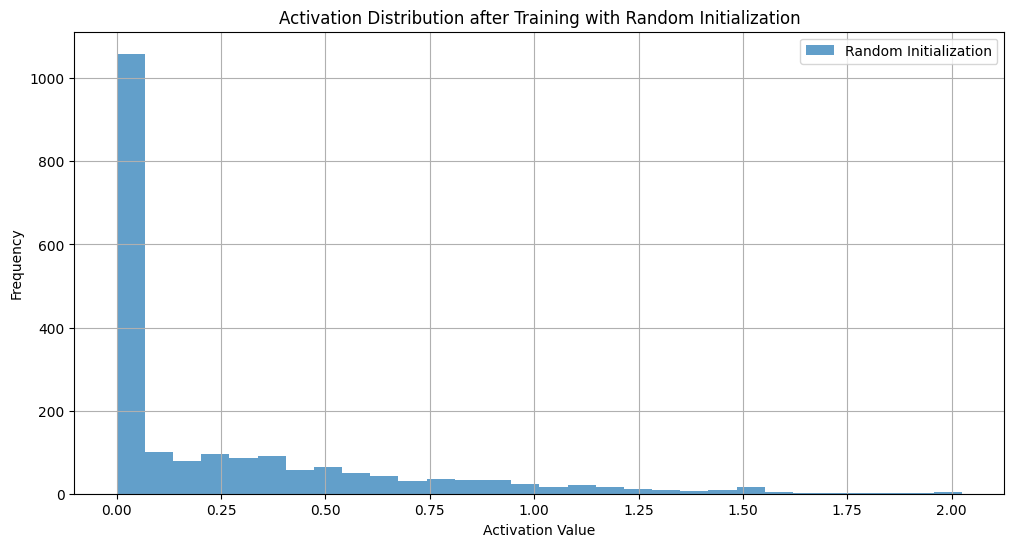

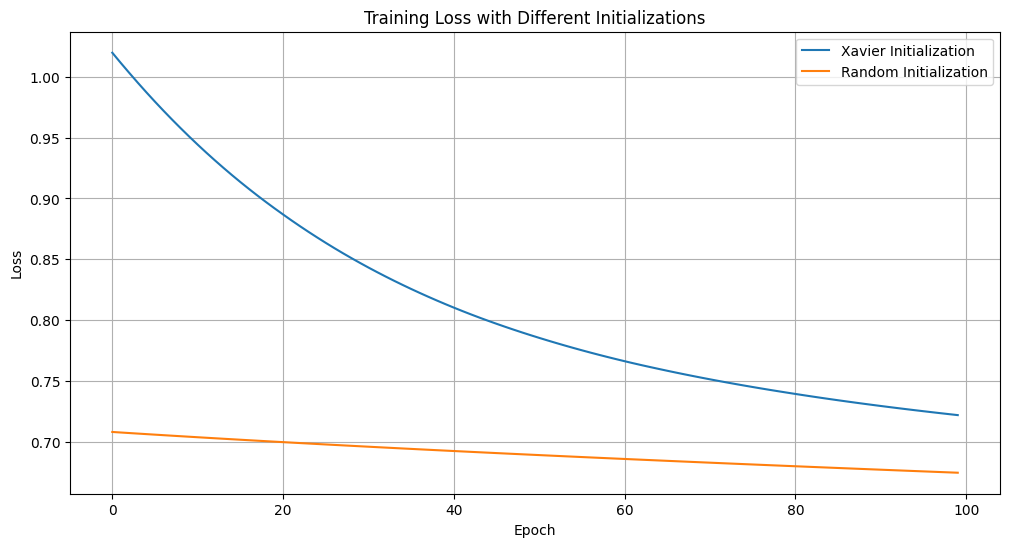

In [81]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, init_method):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.apply(init_method)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def initialize_weights(module):
    if isinstance(module, nn.Linear):
        init.xavier_uniform_(module.weight)
        if module.bias is not None:
            init.zeros_(module.bias)

def train_network(init_method):
    # Create synthetic data
    X = torch.randn(100, 10)
    y = torch.randint(0, 2, (100,))

    # Initialize the network
    model = SimpleNN(input_size=10, hidden_size=20, output_size=2, init_method=init_method)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Training loop
    losses = []
    for epoch in range(100):
        model.train()
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses, model

def plot_losses(losses_dict):
    plt.figure(figsize=(12, 6))
    for init_method, losses in losses_dict.items():
        plt.plot(losses, label=init_method)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss with Different Initializations')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_activations(model, init_method):
    # Generate some inputs
    X = torch.randn(100, 10)
    model.eval()
    with torch.no_grad():
        activations = torch.relu(model.fc1(X)).numpy()
    
    plt.figure(figsize=(12, 6))
    plt.hist(activations.flatten(), bins=30, alpha=0.7, label=init_method)
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.title('Activation Distribution after Training with ' + init_method)
    plt.legend()
    plt.grid(True)
    plt.show()

# Training networks with different initializations
initializations = {
    'Xavier Initialization': initialize_weights,
    'Random Initialization': lambda m: None  # No special initialization
}

losses_dict = {}
for init_method_name, init_method in initializations.items():
    print(f"Training with {init_method_name}...")
    losses, model = train_network(init_method)
    losses_dict[init_method_name] = losses
    plot_activations(model, init_method_name)

plot_losses(losses_dict)


In [84]:
import numpy as np

def compute_numerical_gradient(f, x, epsilon=1e-7):
    grad = np.zeros_like(x)
    for i in range(x.size):
        x[i] += epsilon
        f1 = f(x)
        x[i] -= 2 * epsilon
        f2 = f(x)
        grad[i] = (f1 - f2) / (2 * epsilon)
        x[i] += epsilon  # Restore original value
    return grad

def gradient_check(f, x, analytical_grad):
    numerical_grad = compute_numerical_gradient(f, x)
    relative_error = np.linalg.norm(numerical_grad - analytical_grad) / np.linalg.norm(numerical_grad + analytical_grad)
    return relative_error

# Example usage
def example_function(x):
    return np.sum(x**2)

x = np.array([1.0, 2.0])
analytical_grad = 2 * x  # Gradient of example_function(x) is 2*x
relative_error = gradient_check(example_function, x, analytical_grad)
print(f"Relative Error: {relative_error}")


Relative Error: 2.6917492404166554e-10


Optimal weight (w): 2.9684675107010188
Optimal bias (b): 4.222151077447231
Mean Squared Error (MSE): 0.9924386487246479
R^2 Score: 0.7469629925504755


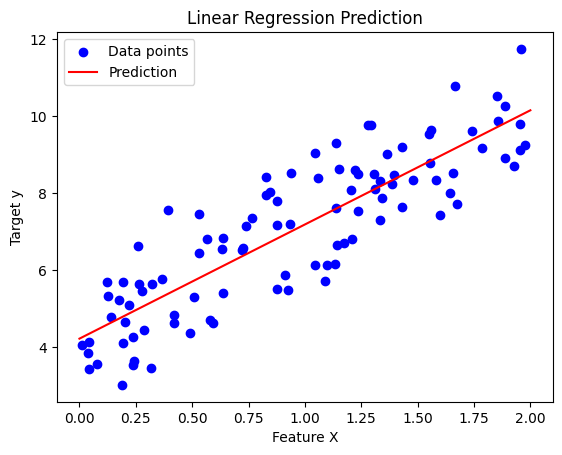

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add bias term (column of ones) for the intercept
X_b = np.c_[np.ones((100, 1)), X]  # Adding bias term

# Compute the optimal weights (w) using the Normal Equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
w_best, b_best = theta_best[1][0], theta_best[0][0]  # Extract weights and bias

# Make predictions
X_new = np.array([[0], [2]])  # Test samples
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term for prediction
y_pred = X_new_b @ theta_best

# Measure accuracy
y_pred_all = X_b @ theta_best
mse = mean_squared_error(y, y_pred_all)
r2 = r2_score(y, y_pred_all)

print(f"Optimal weight (w): {w_best}")
print(f"Optimal bias (b): {b_best}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plotting the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_pred, 'r-', label='Prediction')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()


In [89]:
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# Example parameters
width = 800
height = 600
position_x = 100
position_y = 50
color_r = 255
color_g = 100
color_b = 50

# Normalize parameters
norm_width1 = normalize(width, 0, 1920)
norm_height1 = normalize(height, 0, 1080)
norm_position_x1 = normalize(position_x, 0, 1920)
norm_position_y1 = normalize(position_y, 0, 1080)
norm_color_r1 = normalize(color_r, 0, 255)
norm_color_g1 = normalize(color_g, 0, 255)
norm_color_b1 = normalize(color_b, 0, 255)

# Combine into a vector
param_vector = np.array([norm_width1, norm_height1, norm_position_x1, norm_position_y1, norm_color_r1, norm_color_g1, norm_color_b1])


In [90]:
param_vector

array([0.41666667, 0.55555556, 0.05208333, 0.0462963 , 1.        ,
       0.39215686, 0.19607843])

In [94]:
from sklearn.decomposition import PCA

width = 400
height = 500
position_x = 500
position_y = 502
color_r = 205
color_g = 100
color_b = 50

# Normalize parameters
norm_width2 = normalize(width, 0, 1920)
norm_height2 = normalize(height, 0, 1080)
norm_position_x2 = normalize(position_x, 0, 1920)
norm_position_y2 = normalize(position_y, 0, 1080)
norm_color_r2 = normalize(color_r, 0, 255)
norm_color_g2 = normalize(color_g, 0, 255)
norm_color_b2 = normalize(color_b, 0, 255)

# Assuming you have multiple parameter vectors (data)
param_vectors = np.array([
    # Example vectors for multiple windows
    [norm_width1, norm_height1, norm_position_x1, norm_position_y1, norm_color_r1, norm_color_g1, norm_color_b1],
    [norm_width2, norm_height2, norm_position_x2, norm_position_y2, norm_color_r2, norm_color_g2, norm_color_b2],
    # Add more vectors
])

# Apply PCA to reduce to 2D or 3D
pca = PCA(n_components=2)  # For 2D
compressed_vectors = pca.fit_transform(param_vectors)


In [95]:
param_vectors

array([[0.41666667, 0.55555556, 0.05208333, 0.0462963 , 1.        ,
        0.39215686, 0.19607843],
       [0.20833333, 0.46296296, 0.26041667, 0.46481481, 0.80392157,
        0.39215686, 0.19607843]])

In [100]:
len(param_vectors[0])

7

In [97]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2)
compressed_vectors_tsne = tsne.fit_transform(param_vectors)


ValueError: perplexity must be less than n_samples

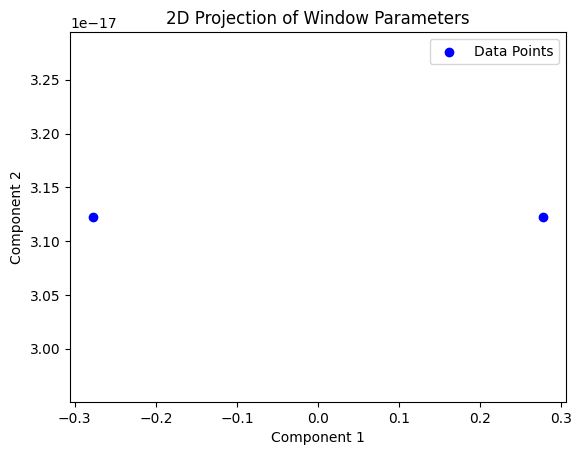

In [101]:
import matplotlib.pyplot as plt

# Assuming compressed_vectors is the output from PCA or t-SNE
plt.scatter(compressed_vectors[:, 0], compressed_vectors[:, 1], c='blue', label='Data Points')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection of Window Parameters')
plt.legend()
plt.show()


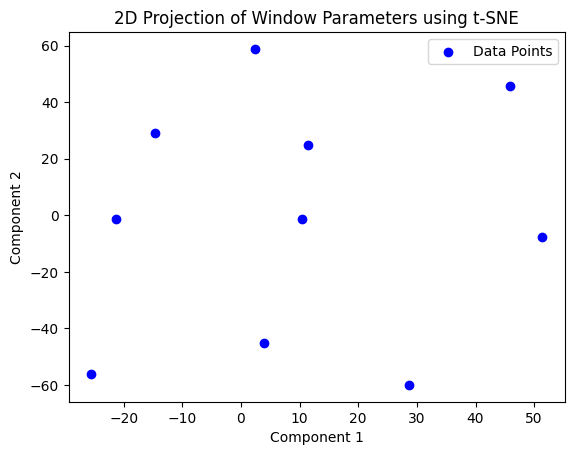

In [102]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
num_samples = 10  # Reduced number of samples for demonstration
param_vectors = np.random.rand(num_samples, 7)  # Example vectors with 7 features

# Apply t-SNE to reduce to 2D
# Ensure that perplexity is less than the number of samples
perplexity_value = min(num_samples - 1, 5)  # Choose a value less than the number of samples

tsne = TSNE(n_components=2, perplexity=perplexity_value)
compressed_vectors_tsne = tsne.fit_transform(param_vectors)

# Plotting the 2D projection
plt.scatter(compressed_vectors_tsne[:, 0], compressed_vectors_tsne[:, 1], c='blue', label='Data Points')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection of Window Parameters using t-SNE')
plt.legend()
plt.show()


In [103]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions before t-SNE
pca = PCA(n_components=50)  # Reduce to 50 components
pca_result = pca.fit_transform(param_vectors)

# Apply t-SNE on the PCA-reduced data
tsne = TSNE(n_components=2, perplexity=perplexity_value)
compressed_vectors_tsne = tsne.fit_transform(pca_result)


ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=7 with svd_solver='full'

In [104]:
import umap

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=2)
compressed_vectors_umap = umap_model.fit_transform(param_vectors)

# Plotting the 2D projection
plt.scatter(compressed_vectors_umap[:, 0], compressed_vectors_umap[:, 1], c='blue', label='Data Points')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection of Window Parameters using UMAP')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'umap'